# **Leads Scoring Case Study**

## **Step 1 : Importing Necessary Libraries**

In [1]:
# Importing Libraries For Analysis and Numerical Functions
import pandas as pd
import numpy as np

# Importing Libraries For Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Fixing Warnings
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# Importing Sklearn Libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

# Importing Statmodel Libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

## **Step 2 : Dataset Loading**

In [3]:
# Creating the dataframe
df = pd.read_csv("Leads.csv")

In [4]:
# Displaying the top rows of the dataframe
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [5]:
# Displaying the bottom rows of the dataframe
df.tail()

Prospect ID  Lead Number  \
9235  19d6451e-fcd6-407c-b83b-48e1af805ea9       579564   
9236  82a7005b-7196-4d56-95ce-a79f937a158d       579546   
9237  aac550fe-a586-452d-8d3c-f1b62c94e02c       579545   
9238  5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9       579538   
9239  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff       579533   

                  Lead Origin     Lead Source Do Not Email Do Not Call  \
9235  Landing Page Submission  Direct Traffic          Yes          No   
9236  Landing Page Submission  Direct Traffic           No          No   
9237  Landing Page Submission  Direct Traffic          Yes          No   
9238  Landing Page Submission          Google           No          No   
9239  Landing Page Submission  Direct Traffic           No          No   

      Converted  TotalVisits  Total Time Spent on Website  \
9235          1          8.0                         1845   
9236          0          2.0                          238   
9237          0          2.0                          199   
9238          1          3.0                          499   
9239          1          6.0                         1279   

      Page Views Per Visit  ... Get updates on DM Content    Lead Profile  \
9235                  2.67  ...                        No  Potential Lead   
9236                  2.00  ...                        No  Potential Lead   
9237                  2.00  ...                        No  Potential Lead   
9238                  3.00  ...                        No             NaN   
9239                  3.00  ...                        No  Potential Lead   

                    City Asymmetrique Activity Index  \
9235              Mumbai                   02.Medium   
9236              Mumbai                   02.Medium   
9237              Mumbai                   02.Medium   
9238  Other Metro Cities                   02.Medium   
9239        Other Cities                   02.Medium   

     Asymmetrique Profile Index Asymmetrique Activity Score  \
9235                    01.High                        15.0   
9236                    01.High                        14.0   
9237                    01.High                        13.0   
9238                  02.Medium                        15.0   
9239                    01.High                        15.0   

     Asymmetrique Profile Score I agree to pay the amount through cheque  \
9235                       17.0                                       No   
9236                       19.0                                       No   
9237                       20.0                                       No   
9238                       16.0                                       No   
9239                       18.0                                       No   

     A free copy of Mastering The Interview Last Notable Activity  
9235                                     No     Email Marked Spam  
9236                                    Yes              SMS Sent  
9237                                    Yes              SMS Sent  
9238                                     No              SMS Sent  
9239                                    Yes              Modified  

[5 rows x 37 columns]

In [6]:
# Displaying the number of rows and columns of the dataframe
df.shape

(9240, 37)

In [7]:
# Printing the information of the dataframe including index dtype, columns, non-null values and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
# Returning the description of the data in dataframe
df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [9]:
# Showing the details of all the available columns in the dataframe
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [10]:
# Observation:
#   This dataset has 9240 rows and 37 columns.
#   Columns are of integer or float or object data type.
#   There are null values in the dataframe.

In [11]:
# Building a logistic regression model to assign a lead score between 0 and 100
# to each of the leads which can be used by the company to target potential leads.

## **Step 3 : Data Cleaning**

In [12]:
# Missing Value Check in the Columns
df.isnull().mean()

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.003896
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.014827
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Country                                          0.266342
Specialization                                   0.155628
How did you hear about X Education               0.238853
What is your current occupation                  0.291126
What matters most to you in choosing a course    0.293182
Search                                           0.000000
Magazine      

In [13]:
# Null value check
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [14]:
# Observation:
#   There are few columns with a high number of missing values/null values in the dataframe.
#   We will address them in the data cleaning step.

In [15]:
# Generating first two rows of the dataframe
df.head(2)

Prospect ID  Lead Number Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737         API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728         API   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   

  Get updates on DM Content Lead Profile    City Asymmetrique Activity Index  \
0                        No       Select  Select                   02.Medium   
1                        No       Select  Select                   02.Medium   

  Asymmetrique Profile Index Asymmetrique Activity Score  \
0                  02.Medium                        15.0   
1                  02.Medium                        15.0   

  Asymmetrique Profile Score I agree to pay the amount through cheque  \
0                       15.0                                       No   
1                       15.0                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  

[2 rows x 37 columns]

In [16]:
# Generating the unique values in each column of the dataframe
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [17]:
# Checking for duplicates
df.drop_duplicates(subset = None, inplace = True)
df.shape

(9240, 37)

In [18]:
print(df.duplicated().sum())

0


In [19]:
# Observation:
#   Target varibale "Converted" is categorical. Hence this is a supervised and binary classification problem.
#   There are no duplicate values in the dataset.

In [20]:
# Numerical types
df.select_dtypes(include = [np.number])

Lead Number  Converted  TotalVisits  Total Time Spent on Website  \
0          660737          0          0.0                            0   
1          660728          0          5.0                          674   
2          660727          1          2.0                         1532   
3          660719          0          1.0                          305   
4          660681          1          2.0                         1428   
...           ...        ...          ...                          ...   
9235       579564          1          8.0                         1845   
9236       579546          0          2.0                          238   
9237       579545          0          2.0                          199   
9238       579538          1          3.0                          499   
9239       579533          1          6.0                         1279   

      Page Views Per Visit  Asymmetrique Activity Score  \
0                     0.00                         15.0   
1                     2.50                         15.0   
2                     2.00                         14.0   
3                     1.00                         13.0   
4                     1.00                         15.0   
...                    ...                          ...   
9235                  2.67                         15.0   
9236                  2.00                         14.0   
9237                  2.00                         13.0   
9238                  3.00                         15.0   
9239                  3.00                         15.0   

      Asymmetrique Profile Score  
0                           15.0  
1                           15.0  
2                           20.0  
3                           17.0  
4                           18.0  
...                          ...  
9235                        17.0  
9236                        19.0  
9237                        20.0  
9238                        16.0  
9239                        18.0  

[9240 rows x 7 columns]

In [21]:
# Categorical types
df.select_dtypes(exclude = [np.number])

Prospect ID              Lead Origin  \
0     7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
1     2a272436-5132-4136-86fa-dcc88c88f482                      API   
2     8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
3     0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
4     3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   
...                                    ...                      ...   
9235  19d6451e-fcd6-407c-b83b-48e1af805ea9  Landing Page Submission   
9236  82a7005b-7196-4d56-95ce-a79f937a158d  Landing Page Submission   
9237  aac550fe-a586-452d-8d3c-f1b62c94e02c  Landing Page Submission   
9238  5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9  Landing Page Submission   
9239  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff  Landing Page Submission   

         Lead Source Do Not Email Do Not Call            Last Activity  \
0         Olark Chat           No          No  Page Visited on Website   
1     Organic Search           No          No             Email Opened   
2     Direct Traffic           No          No             Email Opened   
3     Direct Traffic           No          No              Unreachable   
4             Google           No          No        Converted to Lead   
...              ...          ...         ...                      ...   
9235  Direct Traffic          Yes          No        Email Marked Spam   
9236  Direct Traffic           No          No                 SMS Sent   
9237  Direct Traffic          Yes          No                 SMS Sent   
9238          Google           No          No                 SMS Sent   
9239  Direct Traffic           No          No                 SMS Sent   

           Country             Specialization  \
0              NaN                     Select   
1            India                     Select   
2            India    Business Administration   
3            India      Media and Advertising   
4            India                     Select   
...            ...                        ...   
9235  Saudi Arabia     IT Projects Management   
9236         India      Media and Advertising   
9237         India    Business Administration   
9238         India  Human Resource Management   
9239    Bangladesh    Supply Chain Management   

     How did you hear about X Education What is your current occupation  ...  \
0                                Select                      Unemployed  ...   
1                                Select                      Unemployed  ...   
2                                Select                         Student  ...   
3                         Word Of Mouth                      Unemployed  ...   
4                                 Other                      Unemployed  ...   
...                                 ...                             ...  ...   
9235                             Select                      Unemployed  ...   
9236                             Select                      Unemployed  ...   
9237                             Select                      Unemployed  ...   
9238                      Online Search                             NaN  ...   
9239                             Select                      Unemployed  ...   

           Lead Quality Update me on Supply Chain Content  \
0      Low in Relevance                                No   
1                   NaN                                No   
2              Might be                                No   
3              Not Sure                                No   
4              Might be                                No   
...                 ...                               ...   
9235  High in Relevance                                No   
9236           Might be                                No   
9237           Not Sure                                No   
9238                NaN                                No   
9239           Might be                                No   

     G

In [22]:
# Observation:
#   As per the problem statement, many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value.
#   The reason could be customers might not have selected any option while submitting the form. Hence by default the value is populated as "Select" which is equivalent to NULL.

#### 3.1 Treating "Select" Values

In [23]:
# Finding columns which have "Select" Values
cols=list(df.columns)
for i in cols:
    if 'Select' in df[i].values:
        print(i)

Specialization
How did you hear about X Education
Lead Profile
City


In [24]:
# Replacing 'Select' values to NaN
df = df.replace('Select', np.nan)

In [25]:
# Checking on the available 'select' values and if they are handled
cols_select = [col
      for col in df.columns
          if len(df[col].isin(['Select']).unique())>1]
print(cols_select)

[]


In [26]:
# There are no 'select' leads in the dataframe now.

#### 3.2 Handling Missing Values

In [27]:
# Calculating percentage of missing values
100*(df.isna().mean()).sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [28]:
# Dropping Columns having missing values more than 40%
def dropNullColumns(data ,percentage=40):

    missing_perc = 100*(data.isna().mean()).sort_values(ascending=False)
    col_to_drop = missing_perc[missing_perc>=percentage].index.to_list()
    print("Total columns dropped: ",len(col_to_drop),"\n")
    print("Name of columns dropped : " , col_to_drop,"\n")
    print("Dataframe before dropping columns: ",data.shape)

    data.drop(labels=col_to_drop,axis=1, inplace=True)

    print("Dataframe after dropping columns: ",data.shape)

In [29]:
dropNullColumns(df)

Total columns dropped:  7 

Name of columns dropped :  ['How did you hear about X Education', 'Lead Profile', 'Lead Quality', 'Asymmetrique Profile Score', 'Asymmetrique Activity Score', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index'] 

Dataframe before dropping columns:  (9240, 37)
Dataframe after dropping columns:  (9240, 30)


In [30]:
# Checking the percentage of null values for remaining columns
100*(df.isna().mean()).sort_values(ascending=False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

In [31]:
# Checking columns having non-numeric datatype
categorical_cols = df.select_dtypes(include=['category', 'object']).columns.tolist()
print(categorical_cols)

['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [32]:
# Checking count of values in each categorical columns to treat the missing values
columnsList= ["City","Specialization","Tags",'What matters most to you in choosing a course',
              'What is your current occupation','Country','Last Activity','Lead Source']

for i in columnsList:
        perc=100*df[i].value_counts(normalize=True)
        print("value_counts % for :",i,"\n")
        print(perc,"\n")
        print("___"*40,"\n")

value_counts % for : City 

City
Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: proportion, dtype: float64 

________________________________________________________________________________________________________________________ 

value_counts % for : Specialization 

Specialization
Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.

In [33]:
# Observation:
#   "City, Tags, Country & What matters most to you in choosing a course" have more than 30% of missing values.
#   Imputing Missing values for above will make the data more skewed and will have zero insights.
#   Hence, dropping the above columns.

In [34]:
# Dropping columns
print("Dataframe before dropping columns",df.shape)
df.drop(['City','Tags','Country','What matters most to you in choosing a course'],axis=1,inplace=True)
print("Dataframe after dropping columns",df.shape)

Dataframe before dropping columns (9240, 30)
Dataframe after dropping columns (9240, 26)


In [35]:
# Imputing below columns:
#   'Specialization','Lead Source','Last Activity','What is your current occupation'.
#    For specialization : As the values seems to be evenly distributed, we will create an additional category and impute under name "Others".
#    Lead Source : Google has the highest number of occurrences, will impute the missing value under name "Google".
#    Last Activity : Email Opened has the highest number of values and will impute under name "Email Opened".
#    What is your current occupation : Unemployed has the highest number of values and will impute under name "Unemployed".

In [36]:
missing_values={'Specialization':'Others','Lead Source':'Google','Last Activity':'Email Opened',
               'What is your current occupation':'Unemployed'}
df=df.fillna(value=missing_values)

In [37]:
# Checking percentage of null values for remaining columns
round(((df.isnull().sum()/df.shape[0])*100),2).sort_values(ascending=False)

TotalVisits                                 1.48
Page Views Per Visit                        1.48
Prospect ID                                 0.00
Magazine                                    0.00
A free copy of Mastering The Interview      0.00
I agree to pay the amount through cheque    0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
X Education Forums                          0.00
Newspaper Article                           0.00
Search                                      0.00
Lead Number                                 0.00
What is your current occupation             0.00
Specialization                              0.00
Last Activity                               0.00
Total Time Spent on Website                 0.00
Converted           

In [38]:
# Checking columns "TotalVisits" having numeric datatype
print("TotalVisits - Value Counts")
print("-------------------------")
df.TotalVisits.value_counts().head(10)

TotalVisits - Value Counts
-------------------------


TotalVisits
0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: count, dtype: int64

In [39]:
# Imputing missing values under "TotalVisits"
df['TotalVisits'].fillna(df['TotalVisits'].mode()[0], inplace=True)

In [40]:
# Checking columns "Page Views Per Visit" having numeric datatype
print("Page Views Per Visit - Value Counts")
print("------------------------")
df.TotalVisits.value_counts().head(10)

Page Views Per Visit - Value Counts
------------------------


TotalVisits
0.0    2326
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: count, dtype: int64

In [41]:
# Imputing missing values under "Page Views Per Visit"
df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].mode()[0], inplace=True)

In [42]:
# Checking percentage of NULL values after handling categorical and numerical columns
round(((df.isnull().sum()/df.shape[0])*100),2).sort_values(ascending=False)

Prospect ID                                 0.0
Lead Number                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                                 0.0
Converted                               

#### 3.3 Dropping Unnecessary Columns

In [43]:
# Checking unique value columns
df.describe(include = 'object')

Prospect ID              Lead Origin  \
count                                   9240                     9240   
unique                                  9240                        5   
top     7927b2df-8bba-4d29-b9a2-b6e0beafe620  Landing Page Submission   
freq                                       1                     4886   

       Lead Source Do Not Email Do Not Call Last Activity Specialization  \
count         9240         9240        9240          9240           9240   
unique          21            2           2            17             19   
top         Google           No          No  Email Opened         Others   
freq          2904         8506        9238          3540           3380   

       What is your current occupation Search Magazine  ...  \
count                             9240   9240     9240  ...   
unique                               6      2        1  ...   
top                         Unemployed     No       No  ...   
freq                              8290   9226     9240  ...   

       X Education Forums Newspaper Digital Advertisement  \
count                9240      9240                  9240   
unique                  2         2                     2   
top                    No        No                    No   
freq                 9239      9239                  9236   

       Through Recommendations Receive More Updates About Our Courses  \
count                     9240                                   9240   
unique                       2                                      1   
top                         No                                     No   
freq                      9233                                   9240   

       Update me on Supply Chain Content Get updates on DM Content  \
count                               9240                      9240   
unique                                 1                         1   
top                                   No                        No   
freq                                9240                      9240   

       I agree to pay the amount through cheque  \
count                                      9240   
unique                                        1   
top                                          No   
freq                                       9240   

       A free copy of Mastering The Interview Last Notable Activity  
count                                    9240                  9240  
unique                                      2                    16  
top                                        No              Modified  
freq                                     6352                  3407  

[4 rows x 21 columns]

In [44]:
# Observation:
#   Below columns have one unique value. The response from customer is under one category and is not useful. Hence, can be dropped.
#   'Receive More Updates About Our Courses'
#   'Update me on Supply Chain Content'
#   'Get updates on DM Content'
#   'I agree to pay the amount through cheque'
#   'Magazine'

In [45]:
# Dropping above columns
cols_to_drop = ['Receive More Updates About Our Courses',
                    'Update me on Supply Chain Content',
                    'Get updates on DM Content',
                    'I agree to pay the amount through cheque',
                    'Magazine',]

print("Dataframe before dropping columns",df.shape)
df.drop(cols_to_drop, axis = 1, inplace = True)
print("Dataframe after dropping columns",df.shape)

Dataframe before dropping columns (9240, 26)
Dataframe after dropping columns (9240, 21)


In [46]:
# Dropping unnecessary columns which is not required for modelling

In [47]:
# Checking counts of "Last Notable Activity"
print("Last Notable Activity")
print("----------------------------------------")
100*df['Last Notable Activity'].value_counts(normalize=True)

Last Notable Activity
----------------------------------------


Last Notable Activity
Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Approached upfront               0.010823
Resubscribed to emails           0.010823
View in browser link Clicked     0.010823
Form Submitted on Website        0.010823
Email Received                   0.010823
Name: proportion, dtype: float64

In [48]:
# Dropping 'Last Notable Activity','Prospect ID','Lead Number'
print("Dataframe before dropping columns",df.shape)
df.drop(['Prospect ID','Lead Number','Last Notable Activity'],axis=1,inplace=True)
print("Dataframe after dropping columns",df.shape)

Dataframe before dropping columns (9240, 21)
Dataframe after dropping columns (9240, 18)


In [49]:
# Checking percentage of missing values
100*(df.isna().mean(axis=1)).sort_values(ascending=False).head(10)

0       0.0
6064    0.0
6156    0.0
6157    0.0
6158    0.0
6159    0.0
6160    0.0
6161    0.0
6162    0.0
6163    0.0
dtype: float64

In [50]:
# There is no missing values in the rows.

#### 3.4 Checking and Dropping Skewed Columns

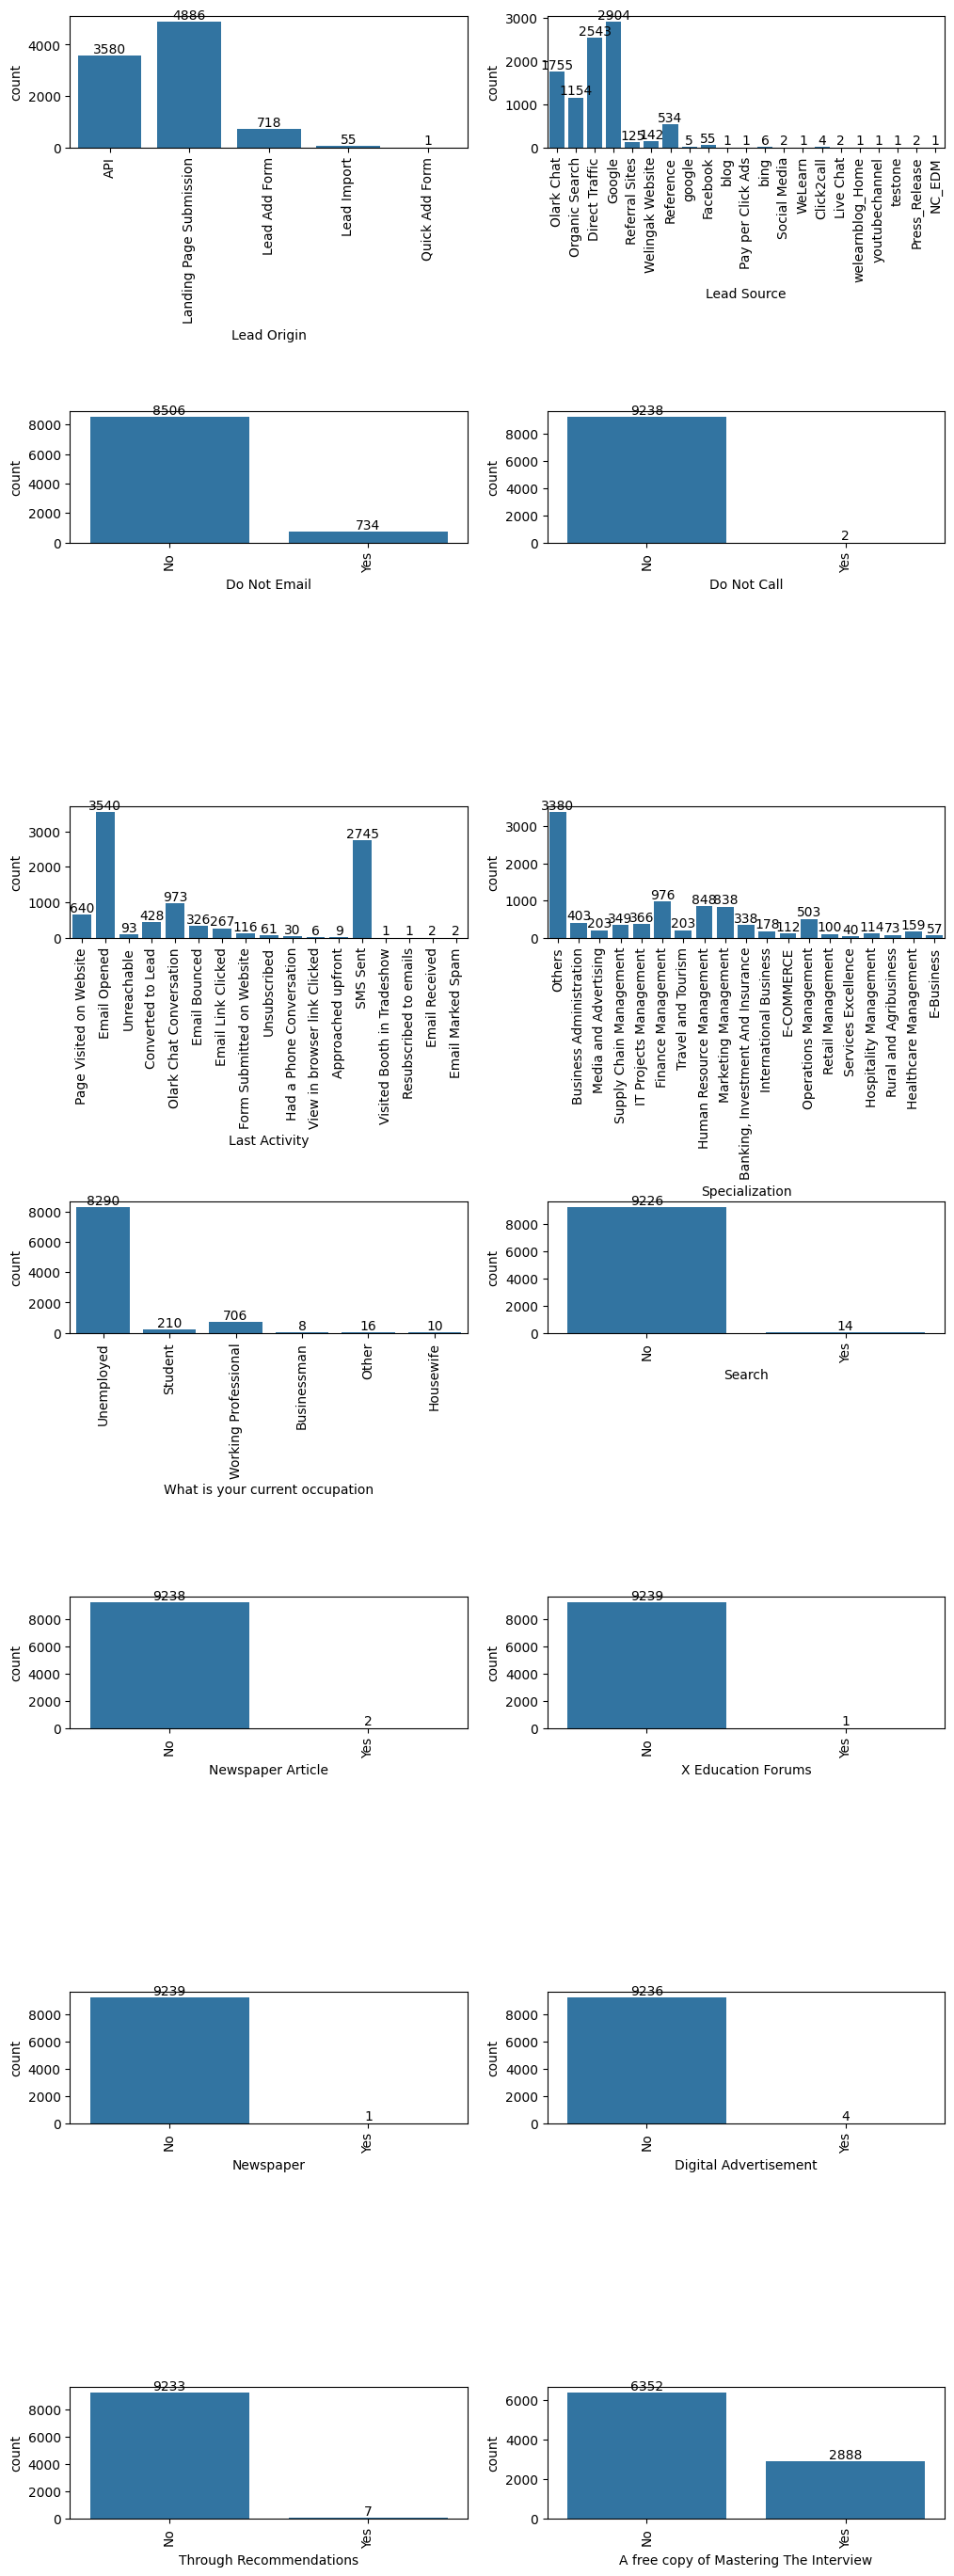

In [51]:
# Drawing countplot for data type "object" and histogram for number to get the data distribution
categorical_col = df.select_dtypes(include=['category', 'object']).columns.tolist()
plt.figure(figsize=(12,40))

plt.subplots_adjust(wspace=.2,hspace=2)
for i in enumerate(categorical_col):
    plt.subplot(8,2, i[0]+1)
    ax=sns.countplot(x=i[1],data=df)
    plt.xticks(rotation=90)

    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

In [52]:
# Observation:
#   Below mentioned columns are highly skewed. They will not be useful for modelling.
#   Also, Skewed variables can affect the performance of logistic regression models, as they can lead to biaseness. Hence, can be dropped.
#   'Do Not Call'
#   'Search'
#   'Newspaper Article'
#   'X Education Forums'
#   'Newspaper'
#   'Digital Advertisement'
#   'Through Recommendations'


In [53]:
# Dropping categorical columns with skewed data
print("Dataframe before dropping columns: ",df.shape)
df.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],axis=1,inplace=True)
print("Dataframe after dropping columns: ",df.shape)

Dataframe before dropping columns:  (9240, 18)
Dataframe after dropping columns:  (9240, 11)


In [54]:
df.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Others   

  What is your current occupation A free copy of Mastering The Interview  
0                      Unemployed                                     No  
1                      Unemployed                                     No  
2                         Student                                    Yes  
3                      Unemployed                                     No  
4                      Unemployed                                     No

#### 3.5 Handling Outliers

In [55]:
# Checking outliers for numerical columns
def Check_Outliers(data,columnList):

    plt.figure(figsize=[22,11])
    plt.subplots_adjust(wspace=0.4,hspace=0.5)

    for i,j in enumerate(columnList):
        plt.subplot(2,2,i+1)

        sns.boxplot(y=data[j])     # y = df[j] to make plot verticle

        plt.suptitle("\nChecking Outliers using Boxplot",fontsize=20,color="green")
        plt.ylabel(None)
        plt.title(j,fontsize=15,color='brown')

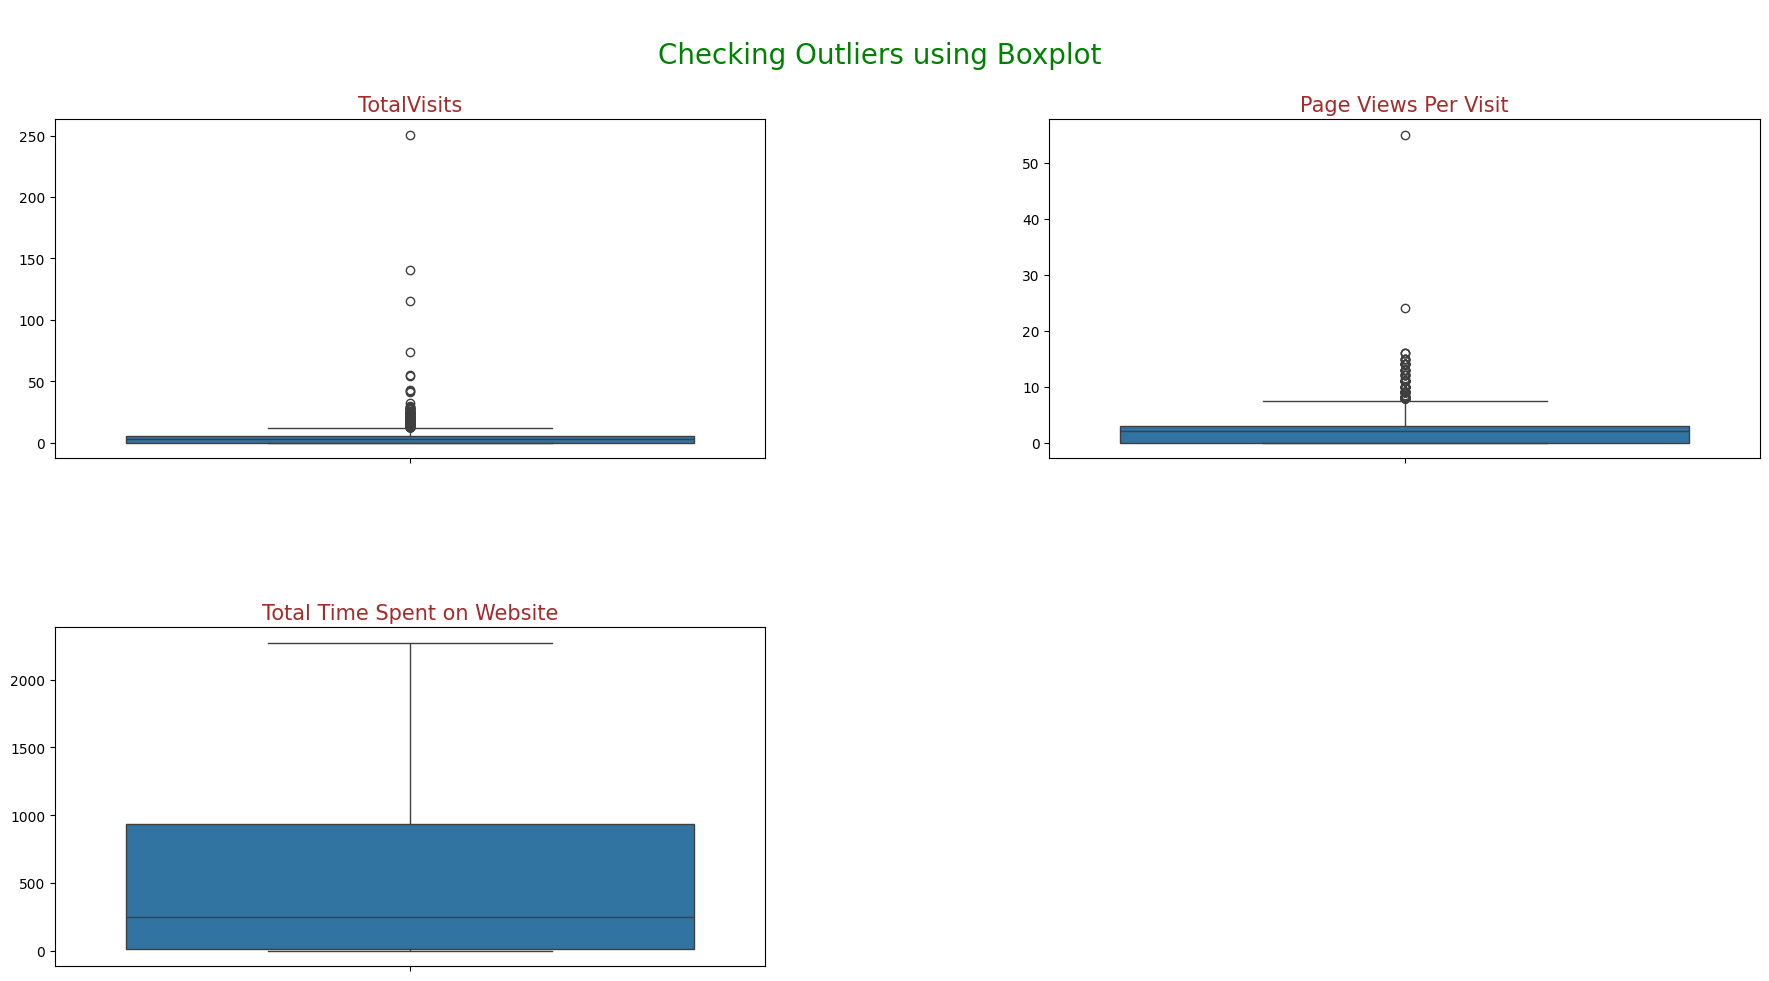

In [56]:
# Checking outliers for numerical variables other than TARGET variable
num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]
Check_Outliers(df,num_cols)

In [57]:
# Observation:
#   "TotalVisits","Page Views Per Visit" variables contain outliers from the above boxplot
#   Hence, these outliers needs to be treated.

In [58]:
# Before outlier treatment
df.describe(percentiles=[.10,.25,.50,.75,.95])

Converted  TotalVisits  Total Time Spent on Website  \
count  9240.000000  9240.000000                  9240.000000   
mean      0.385390     3.394156                   487.698268   
std       0.486714     4.836682                   548.021466   
min       0.000000     0.000000                     0.000000   
10%       0.000000     0.000000                     0.000000   
25%       0.000000     0.000000                    12.000000   
50%       0.000000     3.000000                   248.000000   
75%       1.000000     5.000000                   936.000000   
95%       1.000000    10.000000                  1562.000000   
max       1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9240.000000  
mean               2.327787  
std                2.164258  
min                0.000000  
10%                0.000000  
25%                0.000000  
50%                2.000000  
75%                3.000000  
95%                6.000000  
max               55.000000

In [59]:
# Treating outliers
def Outlier_treatment(df,columnList):
    for i in columnList:
        q1 = df[i].describe()["25%"]
        q3 = df[i].describe()["75%"]
        IQR = q3 - q1

        upper_bound = q3 + 1.5*IQR
        lower_bound = q1 - 1.5*IQR

        # Capping upper_bound
        df[i] = np.where(df[i] > upper_bound, upper_bound,df[i])

        # Flooring lower_bound
        df[i] = np.where(df[i] < lower_bound, lower_bound,df[i])

In [60]:
# Checking outliers for numerical variables other than TARGET variable
capping_cols = ["TotalVisits","Page Views Per Visit"]
Outlier_treatment(df,capping_cols)

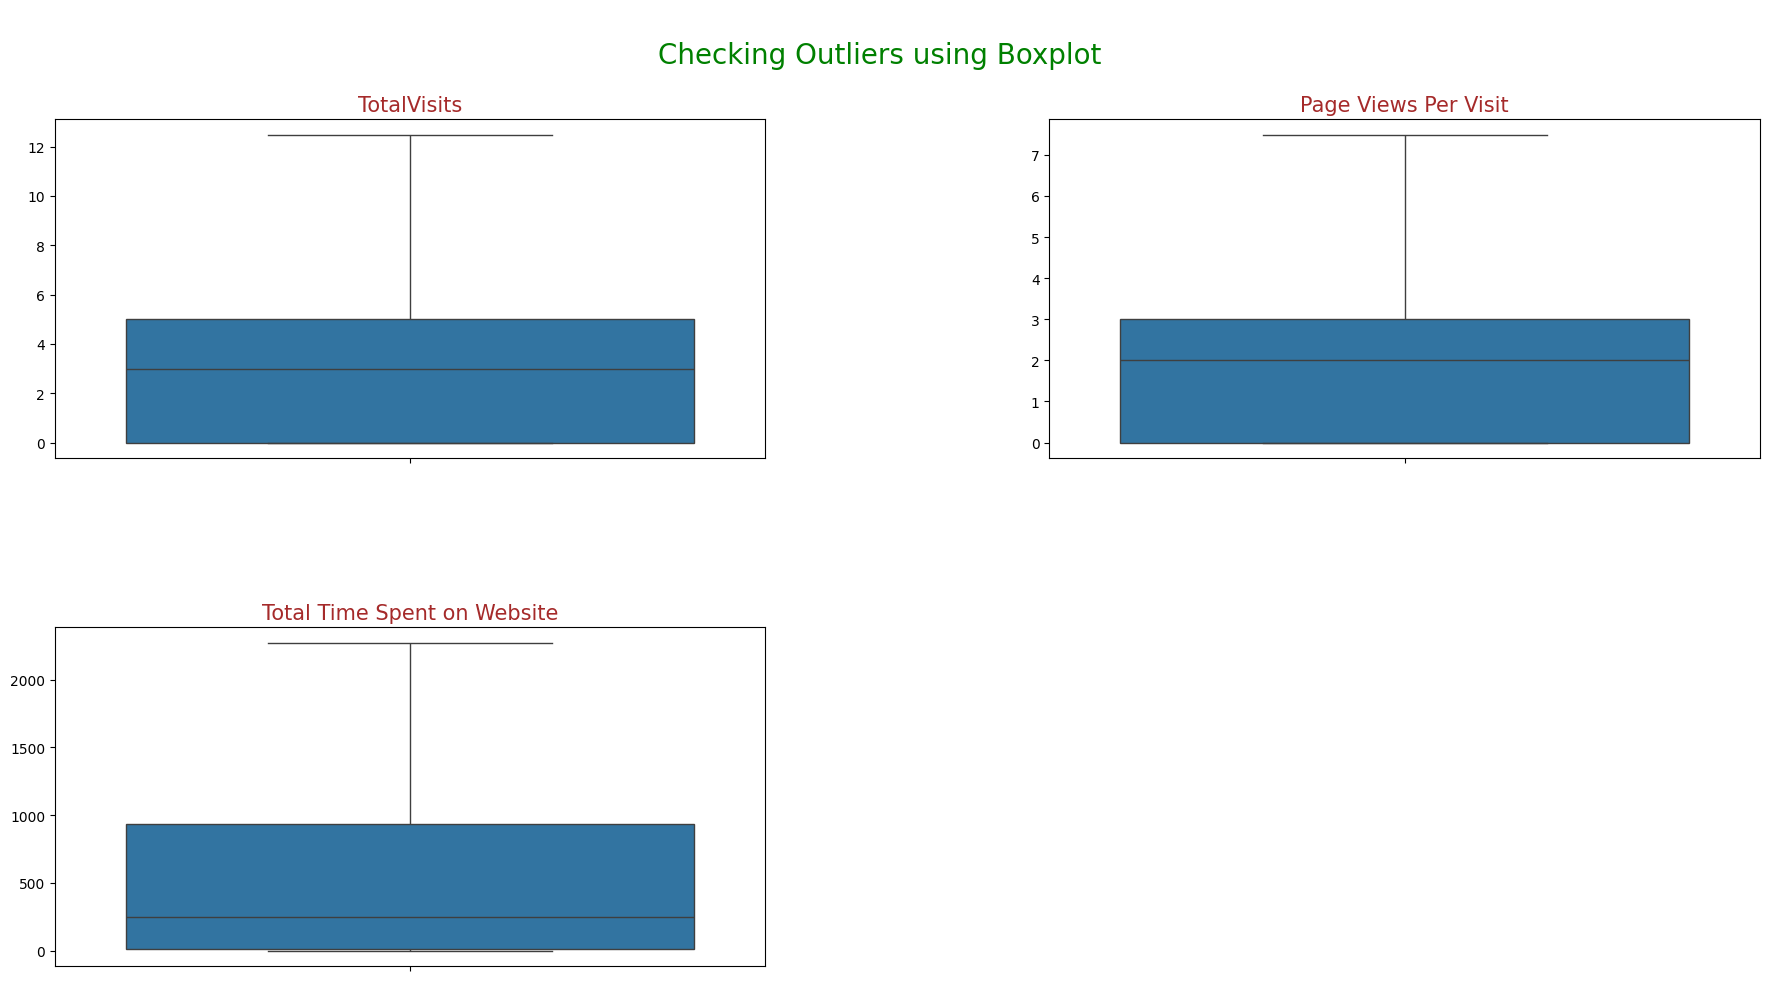

In [61]:
num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]
Check_Outliers(df,num_cols)

In [62]:
# After outlier treatment
df.describe(percentiles=[.10,.25,.50,.75,.95])

Converted  TotalVisits  Total Time Spent on Website  \
count  9240.000000  9240.000000                  9240.000000   
mean      0.385390     3.213853                   487.698268   
std       0.486714     3.005136                   548.021466   
min       0.000000     0.000000                     0.000000   
10%       0.000000     0.000000                     0.000000   
25%       0.000000     0.000000                    12.000000   
50%       0.000000     3.000000                   248.000000   
75%       1.000000     5.000000                   936.000000   
95%       1.000000    10.000000                  1562.000000   
max       1.000000    12.500000                  2272.000000   

       Page Views Per Visit  
count           9240.000000  
mean               2.274987  
std                1.917776  
min                0.000000  
10%                0.000000  
25%                0.000000  
50%                2.000000  
75%                3.000000  
95%                6.000000  
max                7.500000

#### 3.6 Data Standardization

In [63]:
# Grouping low frequency values to "Others"
df['Lead Source'] = df['Lead Source'].replace(["bing","Click2call","Press_Release",
                                                           "Social Media","Live Chat","youtubechannel",
                                                           "testone","Pay per Click Ads","welearnblog_Home",
                                                           "WeLearn","blog","NC_EDM"],"Others")

In [64]:
# Changing "google" to "Google" as they are in the same lead source
df['Lead Source'] = df['Lead Source'].replace("google","Google")

In [65]:
# Checking counts after replace
df["Lead Source"].value_counts(normalize=True)*100

Lead Source
Google              31.482684
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Facebook             0.595238
Others               0.248918
Name: proportion, dtype: float64

In [66]:
# Grouping low frequency values to "Others"
df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                               'Had a Phone Conversation',
                                                               'Approached upfront',
                                                               'View in browser link Clicked',
                                                               'Email Marked Spam',
                                                               'Email Received','Visited Booth in Tradeshow',
                                                               'Resubscribed to emails'],'Others')

In [67]:
# Checking counts after replace
df['Last Activity'].value_counts(normalize=True)*100

Last Activity
Email Opened                 38.311688
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       6.926407
Converted to Lead             4.632035
Email Bounced                 3.528139
Email Link Clicked            2.889610
Others                        2.218615
Form Submitted on Website     1.255411
Name: proportion, dtype: float64

In [68]:
# Renaming column name "A free copy of Mastering The Interview" to "Free_copy"
df.rename(columns={'A free copy of Mastering The Interview': 'Free_copy'}, inplace=True)

# Renaming column name "What is your current occupation" to "Current_occupation"
df.rename(columns={'What is your current occupation': 'Current_occupation'}, inplace=True)

In [69]:
# Observation:
# "Do Not Email" & "Free_copy" both are binary categorical columns. Hence, will map Yes/No to 1/0

In [70]:
# Mapping Yes/No to 1/0
df['Do Not Email'] = df['Do Not Email'].apply(lambda x: 1 if x =='Yes' else 0)
df['Free_copy'] = df['Free_copy'].apply(lambda x: 1 if x =='Yes' else 0)

In [71]:
# Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lead Origin                  9240 non-null   object 
 1   Lead Source                  9240 non-null   object 
 2   Do Not Email                 9240 non-null   int64  
 3   Converted                    9240 non-null   int64  
 4   TotalVisits                  9240 non-null   float64
 5   Total Time Spent on Website  9240 non-null   int64  
 6   Page Views Per Visit         9240 non-null   float64
 7   Last Activity                9240 non-null   object 
 8   Specialization               9240 non-null   object 
 9   Current_occupation           9240 non-null   object 
 10  Free_copy                    9240 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 794.2+ KB


## **Step 4 : Exploratory Data Analysis (EDA)**

In [72]:
# As per problem statement, "Converted" is the Target Variable.
# Target Variable indicates whether a lead is successfully converted or not.
# 1 means Lead is successfully converted and 0 means not converted.

#### 4.1 Univariate Analysis

In [73]:
# Calculating the conversion rate
Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted

38.53896103896104

In [74]:
# Checking distribution of TARGET variable
df.Converted.value_counts()

Converted
0    5679
1    3561
Name: count, dtype: int64

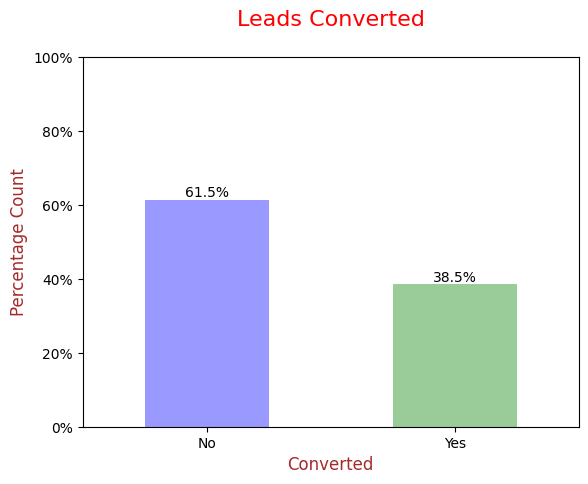

In [75]:
# Drawing bar plot to see data distribution of "Converted"
ax=(100*df["Converted"].value_counts(normalize=True)).plot.bar(color=["Blue","Green"],alpha=0.4)
plt.title("Leads Converted\n", fontdict={'fontsize': 16, 'fontweight' : 12, 'color' : 'Red'})
plt.xlabel('Converted', fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Percentage Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

# yticks
ticks=np.arange(0,101,20)
labels=["{:.0f}%".format(i) for i in ticks]
plt.yticks(ticks,labels)

#xticks
plt.xticks([0,1],["No","Yes"])
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.show()

In [76]:
# Checking imbalance ratio
ratio=(df["Converted"].value_counts(normalize=True).loc[0])/(df["Converted"].value_counts(normalize=True).loc[1])
print("Data Imbalance Ratio : {:.2f} : {}".format(ratio,1))

Data Imbalance Ratio : 1.59 : 1


In [77]:
# Displaying the top rows of the dataframe
df.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization Current_occupation  \
0  Page Visited on Website                   Others         Unemployed   
1             Email Opened                   Others         Unemployed   
2             Email Opened  Business Administration            Student   
3                   Others    Media and Advertising         Unemployed   
4        Converted to Lead                   Others         Unemployed   

   Free_copy  
0          0  
1          0  
2          1  
3          0  
4          0

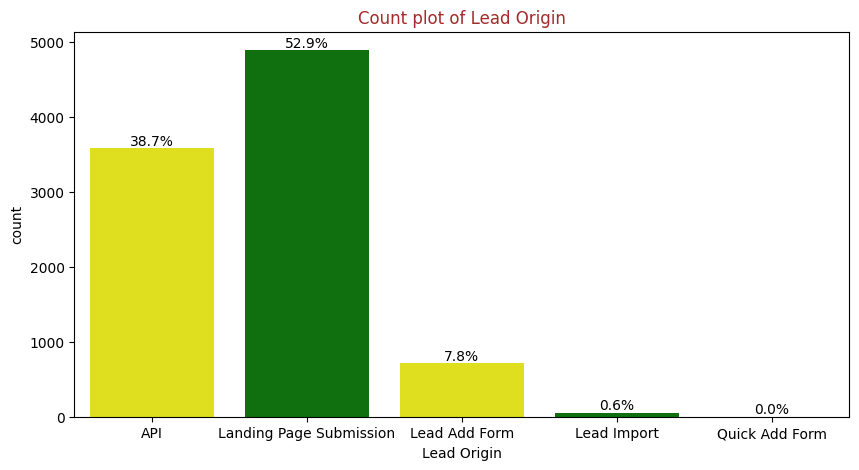

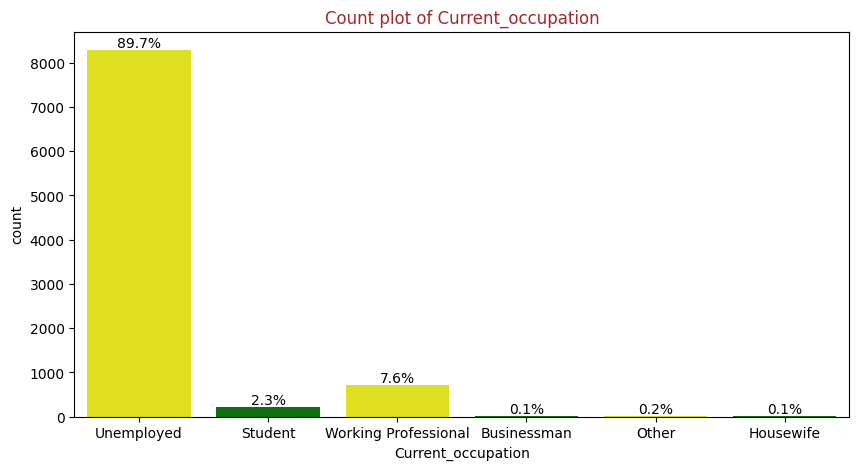

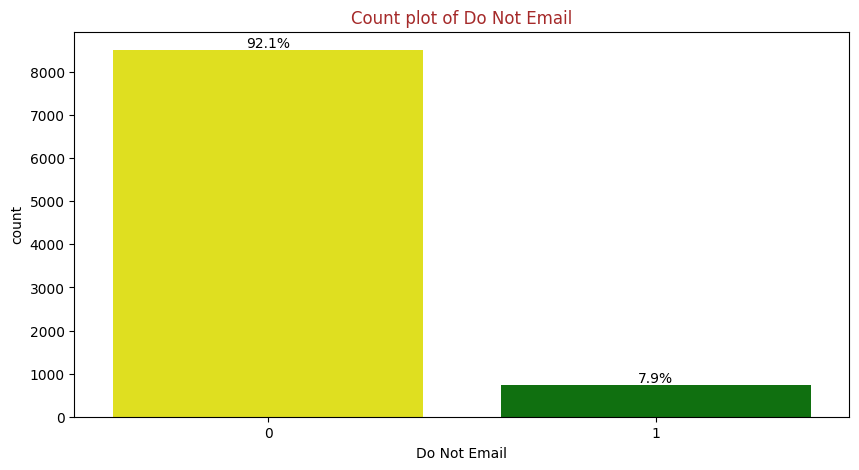

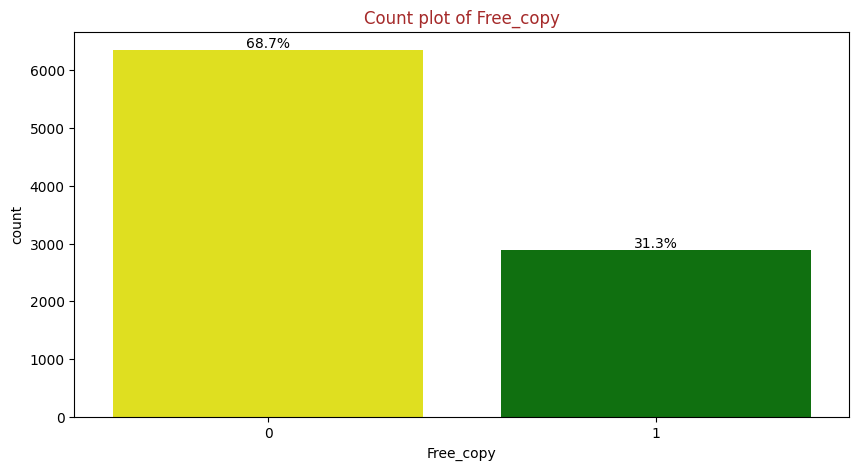

In [78]:
# Drawing countplot for categorical columns
cat_cols = ["Lead Origin","Current_occupation","Do Not Email",
            "Free_copy","Lead Source","Last Activity","Specialization"]

for i in cat_cols[:4]:
    plt.figure(figsize=[10,5])
    plt.title("Count plot of {}".format(i),color="brown")
    ax=sns.countplot(x=i,data=df,palette=["yellow", "green"])
    total=len(df[i])
    plt.xticks(rotation=0)

    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

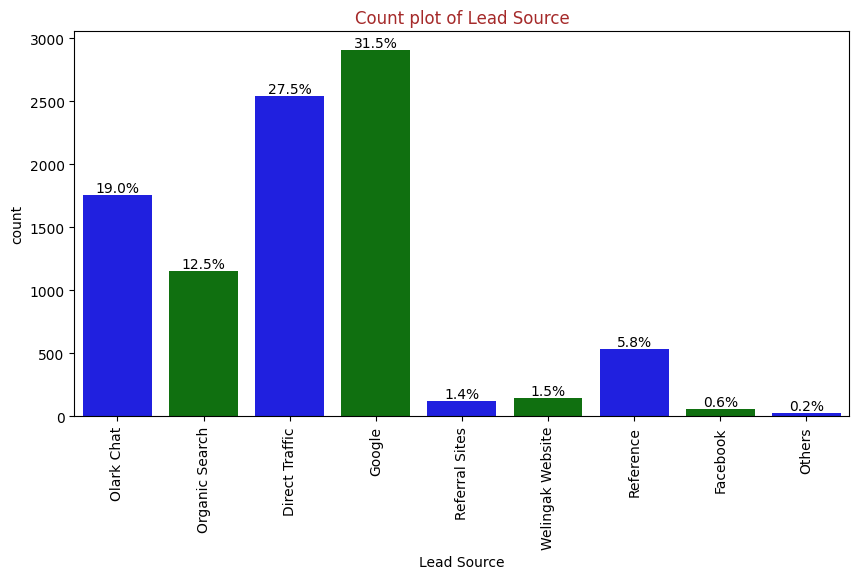

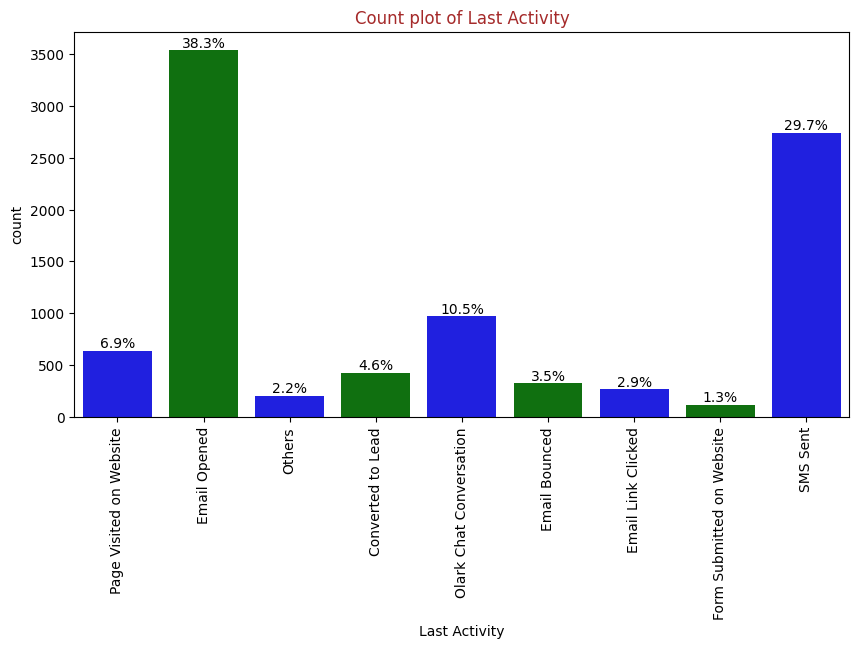

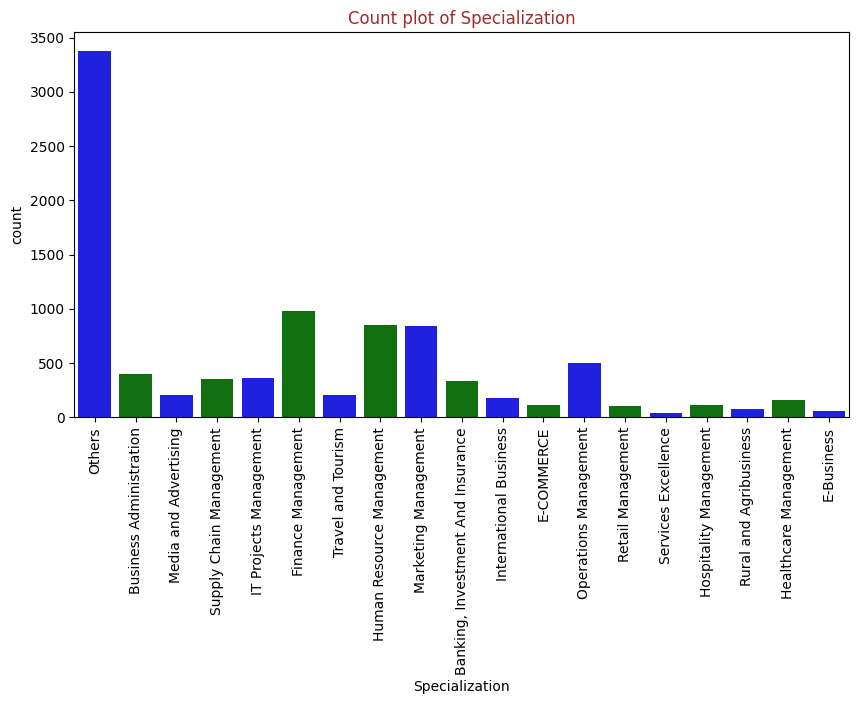

In [79]:
# Drawing barplot for remaining categorical columns
for i in cat_cols[4:]:
    plt.figure(figsize=[10,5])
    plt.title("Count plot of {}".format(i),color="brown")
    ax=sns.countplot(x=i,data=df, palette=["blue", "green"])
    total=len(df[i])
    plt.xticks(rotation=90)

    if i!="Specialization":
        for p in ax.patches:
            text = '{:.1f}%'.format(100*p.get_height()/total)
            x = p.get_x() + p.get_width() / 2.
            y = p.get_height()
            ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    else:
        pass

In [80]:
# Observations:
#   Lead Origin : 52.9% from 'Landing page Submission' and 38.7% from API.
#   Current Occupation : 89.7% are unemployed.
#   Do Not Email : 92.1% has opted not be emailed.
#   Lead Source : 31.5% of sources are from google while 27.5% are from Direct Traffic.
#   Last Activity : 38.3% of the customers opened the emailed where as 29.7% of them checked the sent SMS.
#   Specialization: Finance Management, HR Management & Marketing management are top contributors along with "others".

#### 4.2 Bivariate Analysis

<Figure size 1600x400 with 0 Axes>

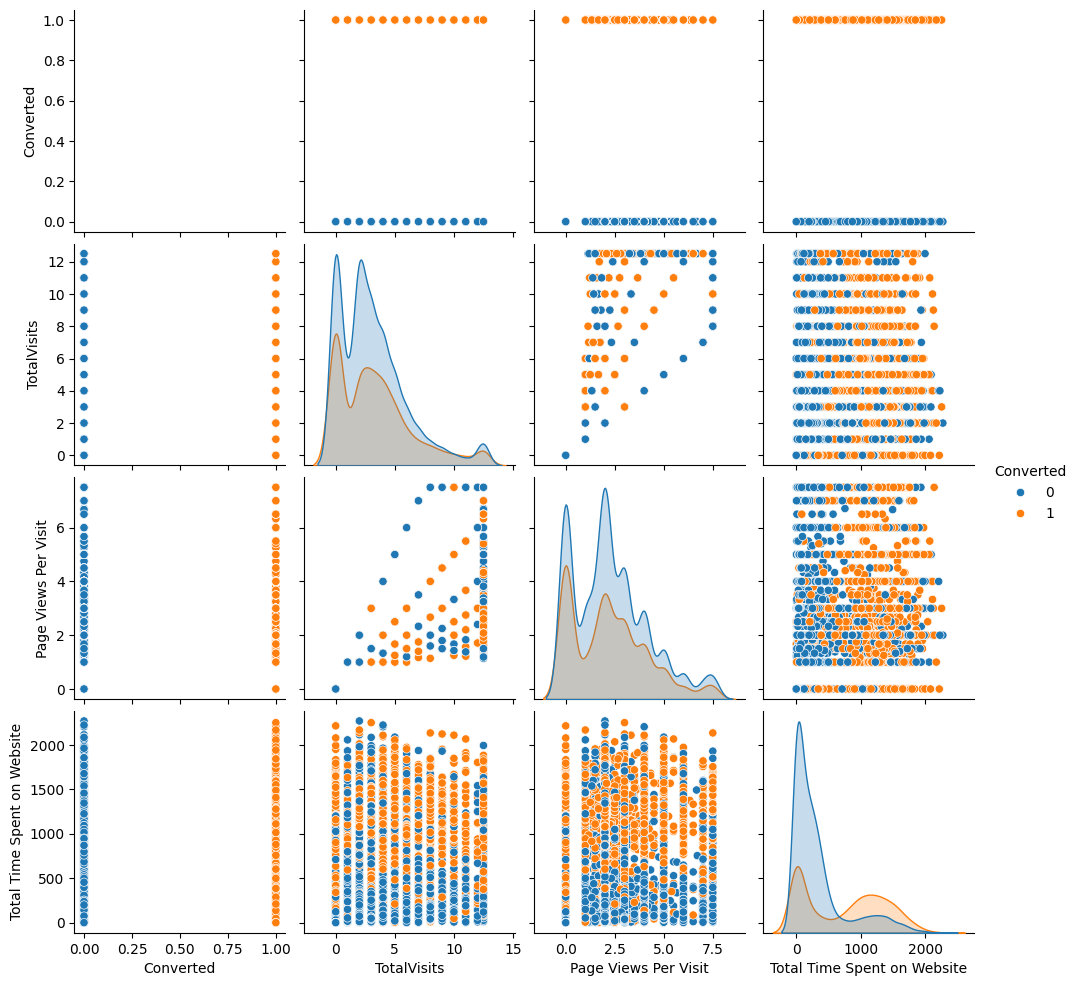

In [81]:
# Bivariate analaysis for numeric variables
num_cols =["Converted",'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

plt.figure(figsize=(16, 4))
sns.pairplot(data=df,vars=num_cols,hue="Converted")
plt.show()

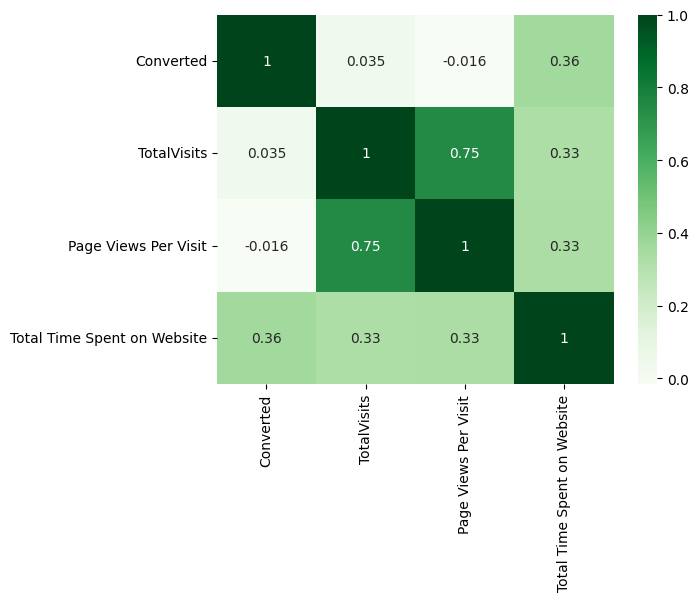

In [82]:
# Heatmap to check the correlkation between attributes
sns.heatmap(data=df[num_cols].corr(),cmap="Greens",annot=True)
plt.show()

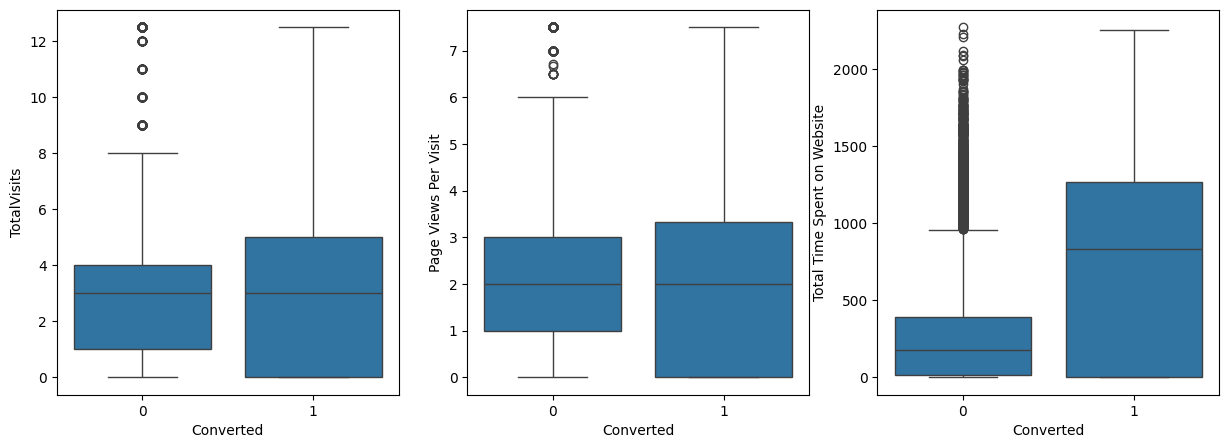

In [83]:
# Drawing boxplot and using the "Converted" coulmn as hue

# Columns to plot
columns_to_plot = ['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

plt.figure(figsize=(15, 5))
for i, column in enumerate(columns_to_plot, start=1):  # Loop over the columns and create subplots
    plt.subplot(1, 3, i)
    sns.boxplot(y=column, x='Converted', data=df)

plt.show()

In [84]:
# Observation:
#   Previous leads who have spent more time on website are converted successfully than those who have spent less time (from Boxplot).
#   Total time spent on website has a correlation of 0.36 with the target variable "Converted" (from Heatmap).
#   "TotalVisits" and "Page Views per Visit" are highly correlated with a correlation of 0.75.

## **Step 5 : Data Preparation**

5.1 Dummy variables

In [85]:
# For categorical variables having multiple levels, so we will create dummy variables.
# We have already mapped binary categorical columns Yes/No to 1/0.

In [86]:
# Displaying the top rows of the dataframe
df.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization Current_occupation  \
0  Page Visited on Website                   Others         Unemployed   
1             Email Opened                   Others         Unemployed   
2             Email Opened  Business Administration            Student   
3                   Others    Media and Advertising         Unemployed   
4        Converted to Lead                   Others         Unemployed   

   Free_copy  
0          0  
1          0  
2          1  
3          0  
4          0

In [87]:
# Creating Dummy Variables for few categorical variables
dummy = pd.get_dummies(df[["Lead Origin","Lead Source","Last Activity","Specialization","Current_occupation"]], drop_first=True)

# Incorporating the results to the dataframe by concatenation
df = pd.concat([df, dummy], axis=1)

In [88]:
df.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization Current_occupation  ...  \
0  Page Visited on Website                   Others         Unemployed  ...   
1             Email Opened                   Others         Unemployed  ...   
2             Email Opened  Business Administration            Student  ...   
3                   Others    Media and Advertising         Unemployed  ...   
4        Converted to Lead                   Others         Unemployed  ...   

   Specialization_Retail Management  Specialization_Rural and Agribusiness  \
0                             False                                  False   
1                             False                                  False   
2                             False                                  False   
3                             False                                  False   
4                             False                                  False   

   Specialization_Services Excellence  Specialization_Supply Chain Management  \
0                               False                                   False   
1                               False                                   False   
2                               False                                   False   
3                               False                                   False   
4                               False                                   False   

   Specialization_Travel and Tourism  Current_occupation_Housewife  \
0                              False                         False   
1                              False                         False   
2                              False                         False   
3                              False                         False   
4                              False                         False   

   Current_occupation_Other  Current_occupation_Student  \
0                     False                       False   
1                     False                       False   
2                     False                        True   
3                     False                       False   
4                     False                       False   

   Current_occupation_Unemployed  Current_occupation_Working Professional  
0                           True                                    False  
1                           True                                    False  
2                          False                                    False  
3                           True                                    False  
4                           True                                    False  

[5 rows x 54 columns]

In [89]:
# Dropping the above categorical variables as dummy variable is created.
print("Dataframe before dropping columns: ",df.shape)
columns_to_drop = ["Lead Origin","Lead Source","Last Activity","Specialization","Current_occupation"]
df = df.drop(columns_to_drop, axis=1)
print("Dataframe after dropping columns: ",df.shape)

Dataframe before dropping columns:  (9240, 54)
Dataframe after dropping columns:  (9240, 49)


In [90]:
df.shape

(9240, 49)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 49 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              9240 non-null   int64  
 1   Converted                                 9240 non-null   int64  
 2   TotalVisits                               9240 non-null   float64
 3   Total Time Spent on Website               9240 non-null   int64  
 4   Page Views Per Visit                      9240 non-null   float64
 5   Free_copy                                 9240 non-null   int64  
 6   Lead Origin_Landing Page Submission       9240 non-null   bool   
 7   Lead Origin_Lead Add Form                 9240 non-null   bool   
 8   Lead Origin_Lead Import                   9240 non-null   bool   
 9   Lead Origin_Quick Add Form                9240 non-null   bool   
 10  Lead Source_Facebook                

## **Step 6 : Test-Train Split**

In [92]:
# Using predictor variables as X
X = df.drop('Converted', axis=1)

# Using Target variables as y
y = df["Converted"]

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

print("X_train:", X_train.shape,"\ny_train:",y_train.shape)

X_train: (6468, 48) 
y_train: (6468,)


In [93]:
print("X_test:", X_test.shape,"\ny_test:",y_test.shape)

X_test: (2772, 48) 
y_test: (2772,)


## **Step 7 : Feature Scaling**

In [94]:
# Using standard scaler for scaling the features
scaler = StandardScaler()

In [95]:
# Fetching integer and float data type columns from dataframe for scaling
num_cols=X_train.select_dtypes(include=['int64','float64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [96]:
# X_train dataframe after standard scaling
X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
1871     -0.291638    -1.064974                    -0.885371   
6795     -0.291638     0.262370                     0.005716   
3516     -0.291638     0.594206                    -0.691418   
8105     -0.291638     0.594206                     1.365219   
3934     -0.291638    -1.064974                    -0.885371   

      Page Views Per Visit  Free_copy  Lead Origin_Landing Page Submission  \
1871             -1.184892  -0.673169                                False   
6795             -0.488713   1.485511                                 True   
3516              0.123715  -0.673169                                False   
8105              1.432322  -0.673169                                 True   
3934             -1.184892  -0.673169                                False   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
1871                      False                    False   
6795                      False                    False   
3516                      False                    False   
8105                      False                    False   
3934                      False                    False   

      Lead Origin_Quick Add Form  Lead Source_Facebook  ...  \
1871                       False                 False  ...   
6795                       False                 False  ...   
3516                       False                 False  ...   
8105                       False                 False  ...   
3934                       False                 False  ...   

      Specialization_Retail Management  Specialization_Rural and Agribusiness  \
1871                             False                                  False   
6795                             False                                  False   
3516                             False                                  False   
8105                             False                                  False   
3934                             False                                  False   

      Specialization_Services Excellence  \
1871                               False   
6795                               False   
3516                               False   
8105                                True   
3934                               False   

      Specialization_Supply Chain Management  \
1871                                   False   
6795                                   False   
3516                                   False   
8105                                   False   
3934                                   False   

      Specialization_Travel and Tourism  Current_occupation_Housewife  \
1871                              False                         False   
6795                              False                         False   
3516                              False                         False   
8105                              False                         False   
3934                              False                         False   

      Current_occupation_Other  Current_occupation_Student  \
1871                     False                       False   
6795                     False                       False   
3516                     False                       False   
8105                     False                       False   
3934                     False                       False   

      Current_occupation_Unemployed  Current_occupation_Working Professional  
1871                           True                                    False  
6795                           True                                    False  
3516                           True                                    False  
8105                           True                                    False  
3934                           True                                    False  

[5 rows x 48 columns]

In [97]:
# Accessing the Lead Conversion Rate(LCR)again where 'Converted' serves as our target variable
LCR = df['Converted'].mean() * 100
LCR

38.53896103896104

In [98]:
# Observation:
#   We have 38.53% of the lead conversion rate.

In [99]:
# We will perform Feature Elimination based on correlations

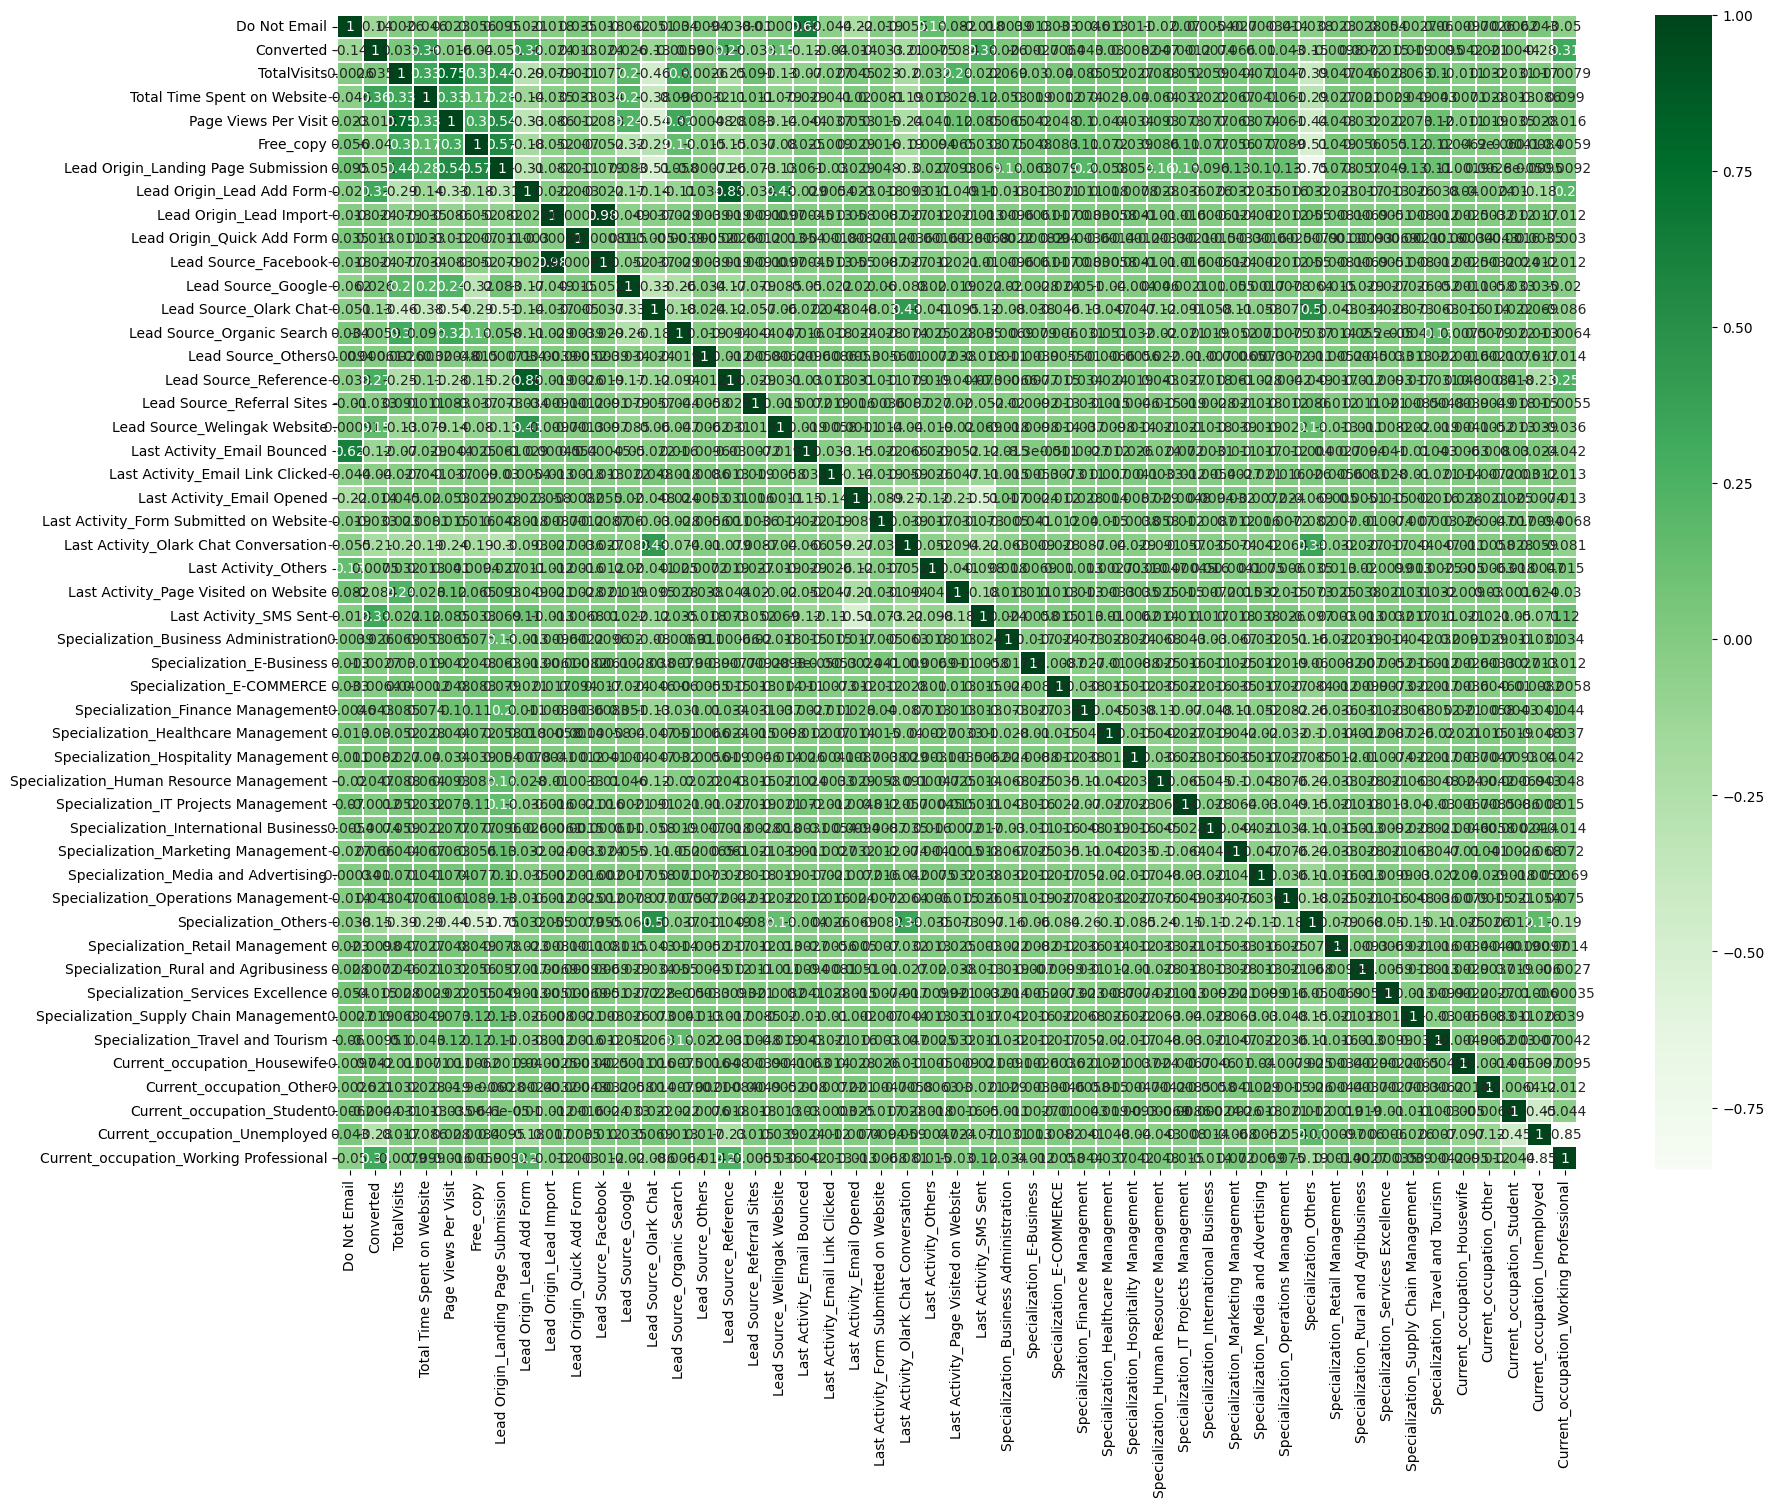

In [100]:
# Analysing the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, linewidths=0.01, cmap="Greens", annot=True)
plt.show()

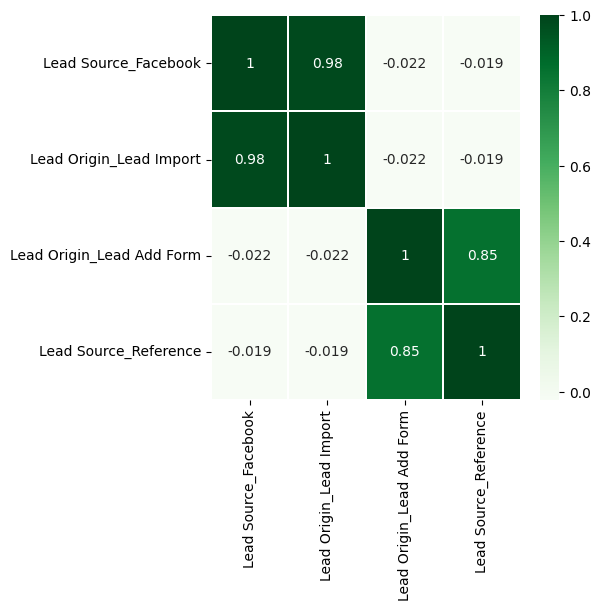

In [101]:
# Checking few variables which might have high correlation
plt.figure(figsize = (5,5))
sns.heatmap(df[["Lead Source_Facebook","Lead Origin_Lead Import","Lead Origin_Lead Add Form","Lead Source_Reference"]].corr(),
            linewidths=0.01,cmap="Greens",annot=True)
plt.show()

In [102]:
# Observation:
#   We see that above variables exhibit very high correlation with each other, approaching values near 0.98 and 0.85 along the diagonal.
#   Consequently, retaining both variables in each pair might not significantly contribute to the model.
#   It is advisable to drop one or more variables from each pair.
#   For this purpose, we opt to remove 'Lead Origin_Lead Import' and 'Lead Origin_Lead Add Form'.

In [103]:
# Columns to drop
columns_to_drop = ['Lead Origin_Lead Import', 'Lead Origin_Lead Add Form']

# Dropping columns from X_test and X_train
X_test = X_test.drop(columns_to_drop, axis=1)
X_train = X_train.drop(columns_to_drop, axis=1)

## **Step 8 : Model Building**

In [104]:
# Model building involves constructing a Logistic Regression Model to predict categorical variables.
# We will use Recursive Feature Elimination (RFE) for initial feature selection.
# Followed by manual refinement process using p-values and Variance Inflation Factors (VIFs).

#### 8.1 Feature selection using RFE

In [105]:
# Using RFE to reduce variables

In [106]:
logreg = LogisticRegression()

In [107]:
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [108]:
# Checking RFE values
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 11),
 ('TotalVisits', False, 9),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('Free_copy', False, 18),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Quick Add Form', False, 19),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 22),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 28),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 24),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 14),
 ('Last Activity_Email Link Clicked', False, 6),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 29),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 12),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 

In [109]:
# Checking the top 15 features chosen by RFE
top15=pd.DataFrame()
top15['features']=X_train.columns
top15['Feature Chosen'] = rfe.support_
top15['Ranking']=rfe.ranking_
top15.sort_values(by='Ranking')

features  Feature Chosen  Ranking
22                    Last Activity_SMS Sent            True        1
41              Current_occupation_Housewife            True        1
35                     Specialization_Others            True        1
28     Specialization_Hospitality Management            True        1
20                      Last Activity_Others            True        1
19     Last Activity_Olark Chat Conversation            True        1
17                Last Activity_Email Opened            True        1
14              Lead Source_Welingak Website            True        1
12                     Lead Source_Reference            True        1
11                        Lead Source_Others            True        1
45   Current_occupation_Working Professional            True        1
9                     Lead Source_Olark Chat            True        1
7                       Lead Source_Facebook            True        1
5        Lead Origin_Landing Page Submission            True        1
2                Total Time Spent on Website            True        1
44             Current_occupation_Unemployed           False        2
42                  Current_occupation_Other           False        3
43                Current_occupation_Student           False        4
37     Specialization_Rural and Agribusiness           False        5
16          Last Activity_Email Link Clicked           False        6
31     Specialization_International Business           False        7
36          Specialization_Retail Management           False        8
1                                TotalVisits           False        9
3                       Page Views Per Visit           False       10
0                               Do Not Email           False       11
21     Last Activity_Page Visited on Website           False       12
23    Specialization_Business Administration           False       13
15               Last Activity_Email Bounced           False       14
34      Specialization_Operations Management           False       15
29  Specialization_Human Resource Management           False       16
32       Specialization_Marketing Management           False       17
4                                  Free_copy           False       18
6                 Lead Origin_Quick Add Form           False       19
38        Specialization_Services Excellence           False       20
39    Specialization_Supply Chain Management           False       21
8                         Lead Source_Google           False       22
25                 Specialization_E-COMMERCE           False       23
13                Lead Source_Referral Sites           False       24
30     Specialization_IT Projects Management           False       25
27      Specialization_Healthcare Management           False       26
26         Specialization_Finance Management           False       27
10                Lead Source_Organic Search           False       28
18   Last Activity_Form Submitted on Website           False       29
33      Specialization_Media and Advertising           False       30
24                 Specialization_E-Business           False       31
40         Specialization_Travel and Tourism           False       32

In [110]:
# Checking columns selected by RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Facebook', 'Lead Source_Olark Chat', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'Current_occupation_Housewife',
       'Current_occupation_Working Professional'],
      dtype='object')

In [111]:
# Checking columns rejected by RFE
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit', 'Free_copy',
       'Lead Origin_Quick Add Form', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
      

In [112]:
# Calculating VIFs for the variables
def get_vif(model_df):
    X = pd.DataFrame()
    X['Features'] = model_df.columns
    X['VIF'] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
    X['VIF'] = round(X['VIF'], 2)
    X = X.sort_values(by='VIF', ascending=False)
    X = X.reset_index(drop=True)
    return X

#### Model 1

In [113]:
# Building models using statsmodels

import statsmodels.api as sm

# Select columns chosen by RFE for this model
rfe_col=X_train.columns[rfe.support_]

# Create X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Add a constant variable
X_train_sm1 = sm.add_constant(X_train_rfe)

# Convert y_train and X_train_sm1 to float
y_train = y_train.astype(float)
X_train_sm1 = X_train_sm1.astype(float)

# Fit the logistic regression model
logm1 = sm.GLM(y_train,X_train_sm1,family = sm.families.Binomial()).fit()

logm1.params

const                                      -1.033284
Total Time Spent on Website                 1.050544
Lead Origin_Landing Page Submission        -1.272090
Lead Source_Facebook                       -0.696059
Lead Source_Olark Chat                      0.900083
Lead Source_Others                          0.980708
Lead Source_Reference                       2.897685
Lead Source_Welingak Website                5.380227
Last Activity_Email Opened                  0.950623
Last Activity_Olark Chat Conversation      -0.553411
Last Activity_Others                        1.258012
Last Activity_SMS Sent                      2.068763
Specialization_Hospitality Management      -1.072037
Specialization_Others                      -1.193681
Current_occupation_Housewife               23.022209
Current_occupation_Working Professional     2.685466
dtype: float64

In [114]:
# Print the model parameters
print(logm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2732.8
Date:                Tue, 21 May 2024   Deviance:                       5465.5
Time:                        15:11:32   Pearson chi2:                 8.09e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3839
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [115]:
# Observation:
#   We will remove "Current_occupation_Housewife" due to high P-value of 0.999.
#   Since, the accepted P-value is 0.05

#### Model 2

In [116]:
# Dropping "Current_occupation_Housewife" column
rfe_col=rfe_col.drop("Current_occupation_Housewife")

# Create X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Add a constant variable
X_train_sm2 = sm.add_constant(X_train_rfe)

# Convert y_train and X_train_sm1 to float
y_train = y_train.astype(float)
X_train_sm2 = X_train_sm2.astype(float)

# Fit the logistic regression model
logm2 = sm.GLM(y_train,X_train_sm2,family = sm.families.Binomial()).fit()

logm2.params

const                                     -1.025075
Total Time Spent on Website                1.049364
Lead Origin_Landing Page Submission       -1.267369
Lead Source_Facebook                      -0.696913
Lead Source_Olark Chat                     0.899051
Lead Source_Others                         0.973897
Lead Source_Reference                      2.917123
Lead Source_Welingak Website               5.379144
Last Activity_Email Opened                 0.949036
Last Activity_Olark Chat Conversation     -0.558345
Last Activity_Others                       1.248172
Last Activity_SMS Sent                     2.058828
Specialization_Hospitality Management     -1.079528
Specialization_Others                     -1.197801
Current_occupation_Working Professional    2.677350
dtype: float64

In [117]:
# Print the model parameters
print(logm2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2740.3
Date:                Tue, 21 May 2024   Deviance:                       5480.7
Time:                        15:11:32   Pearson chi2:                 8.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3825
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [118]:
# Observation:
#   We will remove "Lead Source_Facebook" due to high P-value of 0.187.
#   Since, the accepted P-value is 0.05

#### Model 3

In [119]:
# Dropping "Lead Source_Facebook" column
rfe_col=rfe_col.drop("Lead Source_Facebook")

# Create X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Add a constant variable
X_train_sm3 = sm.add_constant(X_train_rfe)

# Convert y_train and X_train_sm1 to float
y_train = y_train.astype(float)
X_train_sm3 = X_train_sm3.astype(float)

# Fit the logistic regression model
logm3 = sm.GLM(y_train,X_train_sm3,family = sm.families.Binomial()).fit()

logm3.params

const                                     -1.040542
Total Time Spent on Website                1.051824
Lead Origin_Landing Page Submission       -1.249311
Lead Source_Olark Chat                     0.916940
Lead Source_Others                         0.981395
Lead Source_Reference                      2.937179
Lead Source_Welingak Website               5.396676
Last Activity_Email Opened                 0.943420
Last Activity_Olark Chat Conversation     -0.558250
Last Activity_Others                       1.248700
Last Activity_SMS Sent                     2.055550
Specialization_Hospitality Management     -1.090368
Specialization_Others                     -1.194330
Current_occupation_Working Professional    2.675678
dtype: float64

In [120]:
# Print the model parameters
print(logm3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2741.3
Date:                Tue, 21 May 2024   Deviance:                       5482.6
Time:                        15:11:32   Pearson chi2:                 8.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3823
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [121]:
# Observation:
#   We will remove "Lead Source_Others" due to high P-value of 0.055.
#   Since, the accepted P-value is 0.05

#### Model 4

In [122]:
# Dropping "Lead Source_Others" column
rfe_col=rfe_col.drop("Lead Source_Others")

# Create X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Add a constant variable
X_train_sm4 = sm.add_constant(X_train_rfe)

# Convert y_train and X_train_sm1 to float
y_train = y_train.astype(float)
X_train_sm4 = X_train_sm4.astype(float)

# Fit the logistic regression model
logm4 = sm.GLM(y_train,X_train_sm4,family = sm.families.Binomial()).fit()

logm4.params

const                                     -1.023594
Total Time Spent on Website                1.049789
Lead Origin_Landing Page Submission       -1.258954
Lead Source_Olark Chat                     0.907184
Lead Source_Reference                      2.925326
Lead Source_Welingak Website               5.388662
Last Activity_Email Opened                 0.942099
Last Activity_Olark Chat Conversation     -0.555605
Last Activity_Others                       1.253061
Last Activity_SMS Sent                     2.051879
Specialization_Hospitality Management     -1.094445
Specialization_Others                     -1.203333
Current_occupation_Working Professional    2.669665
dtype: float64

In [123]:
# Print the model parameters
print(logm4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2743.1
Date:                Tue, 21 May 2024   Deviance:                       5486.1
Time:                        15:11:32   Pearson chi2:                 8.11e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3819
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [124]:
# Observation:
#    Model 4 is stable, checking its P-value.
#    Given its stability and statistically significant p-values below the threshold of 0.05,
#    we'll proceed with utilizing Model 4 for further analysis.
#    In Model 4, VIF is also less than 5, hence no variable needs to be dropped.

## **Step 9: Model Evaluation**

In [125]:
# Getting the predicted values on the train set
y_train_pred = logm4.predict(X_train_sm4)
y_train_pred[:10]

1871    0.474082
6795    0.073252
3516    0.249087
8105    0.768973
3934    0.212973
4844    0.987807
3297    0.108454
8071    0.996128
987     0.169259
7423    0.869641
dtype: float64

In [126]:
# Reshaping
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.47408215, 0.07325161, 0.24908697, 0.7689732 , 0.2129729 ,
       0.9878074 , 0.1084541 , 0.99612765, 0.16925902, 0.86964073])

In [127]:
# Creating dataframe with the actual Converted flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index   # Adding column 'Prospect ID' for indexing:
y_train_pred_final.head()                           # Displaying head of the dataframe

Converted  Converted_Prob  Prospect ID
0        0.0        0.474082         1871
1        0.0        0.073252         6795
2        0.0        0.249087         3516
3        0.0        0.768973         8105
4        0.0        0.212973         3934

In [128]:
# Observation:
#   Now, we have to find the optimal cutoff Threshold value of Probability.
#   Optimal cutoff probability is that probability where we get balanced sensitivity and specificity.

In [129]:
# Creating columns with different probability cutoffs
y_train_pred_final['Predicted'] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.5 else 0)

# checking head of the dataframe
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  Predicted
0        0.0        0.474082         1871          0
1        0.0        0.073252         6795          0
2        0.0        0.249087         3516          0
3        0.0        0.768973         8105          1
4        0.0        0.212973         3934          0


#### 9.1 Confusion Matrix

In [130]:
# Confusion matrix  (Actual / predicted)

confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
print(confusion)

[[3588  414]
 [ 846 1620]]


In [131]:
# We get the confusion matrix as above, when threshold probability is 0.5

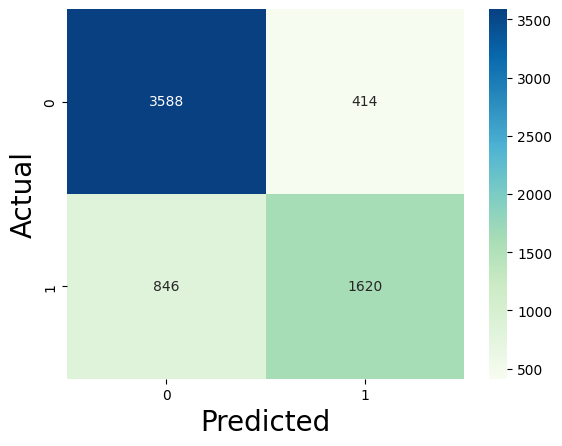

In [132]:
# Plotting confusion matrix:-
sns.heatmap(confusion, annot=True,fmt='g',cmap='GnBu')
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.show()

#### 9.2 Accuracy

In [133]:
# Checking the overall accuracy
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["Predicted"]))

0.8051948051948052


In [134]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [135]:
# Checking sensitivity of the logistic regression model
TP / float(TP+FN)

0.656934306569343

In [136]:
# Calculating specificity
TN / float(TN+FP)

0.896551724137931

In [137]:
# Calculating false postive rate : predicting conversion when customer does not have converted
print(FP/ float(TN+FP))

0.10344827586206896


In [138]:
# Positive predictive value
print (TP / float(TP+FP))

0.7964601769911505


In [139]:
# Negative predictive value
print (TN / float(TN+FN))

0.8092016238159675


#### 9.3 Precision and Recall

In [140]:
# Precision
TP / float(TP + FP)

0.7964601769911505

In [141]:
# Recall
TP / float(TP + FN)

0.656934306569343

In [142]:
# Calculating 'Recall'
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.656934306569343

#### 9.4 Plotting ROC Curve

In [143]:
# ROC Curve provides the visual representation of the trade-off between sensitivity and specificity.
# Closer the curve follows left-hand border and then top border of the ROC space, more accurate is the test.
# Closer the curve comes to the 45-degree diagonal of the ROC space, less accurate is the test.

In [144]:
# Drawing ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [145]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"], drop_intermediate = False )

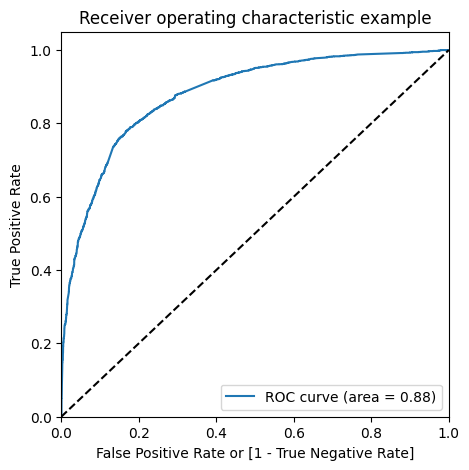

In [146]:
# Drawing ROC curve for Train Set
draw_roc(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"])

In [147]:
# observation:
#   ROC Curve area is 0.88 out of 1 which indicates a good predictive model

In [148]:
# Finding Optimal Cutoff Point/ Probability
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  0.4  \
0        0.0        0.474082         1871          0    1    1    1    1    1   
1        0.0        0.073252         6795          0    1    0    0    0    0   
2        0.0        0.249087         3516          0    1    1    1    0    0   
3        0.0        0.768973         8105          1    1    1    1    1    1   
4        0.0        0.212973         3934          0    1    1    1    0    0   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    1    1    1    0    0  
4    0    0    0    0    0

In [149]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs

In [150]:
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])

In [151]:
# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

In [152]:
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.381262     1.000000     0.000000
0.1          0.1  0.595702     0.973642     0.362819
0.2          0.2  0.721243     0.920114     0.598701
0.3          0.3  0.791280     0.832928     0.765617
0.4          0.4  0.813698     0.763585     0.844578
0.5          0.5  0.805195     0.656934     0.896552
0.6          0.6  0.792981     0.585969     0.920540
0.7          0.7  0.779066     0.507705     0.946277
0.8          0.8  0.754020     0.405515     0.968766
0.9          0.9  0.707792     0.247364     0.991504


In [153]:
# Importing required library for 'precision_recall_curve'
from sklearn.metrics import precision_recall_curve

In [154]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

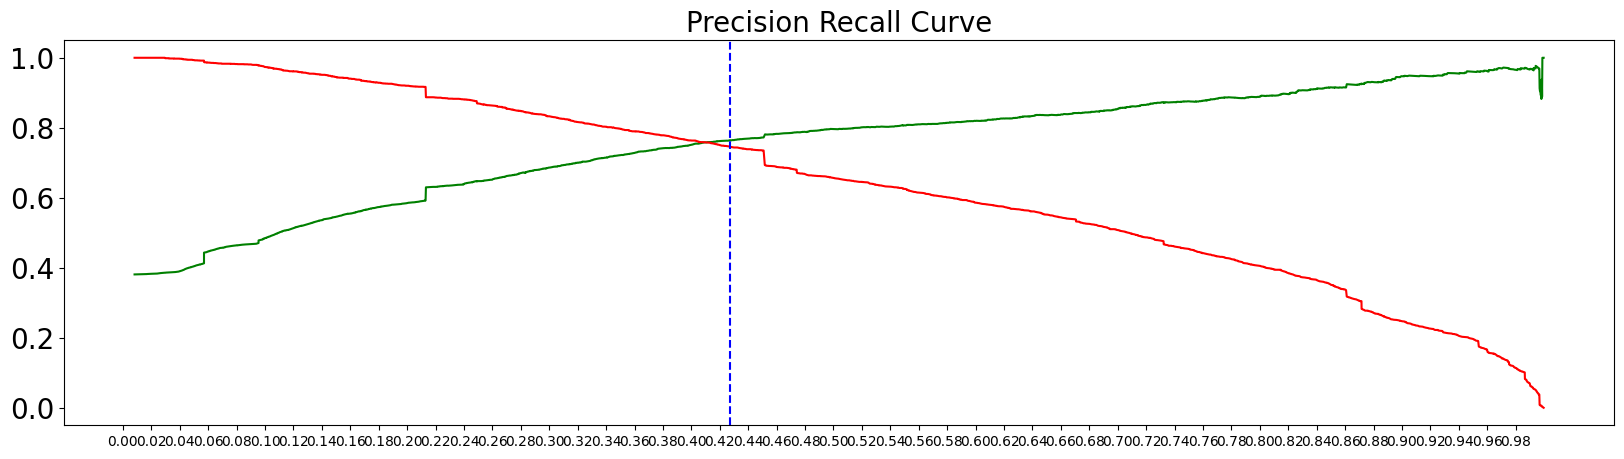

In [155]:
plt.figure(figsize=(20,5))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.title('Precision Recall Curve',fontsize=20)
plt.axvline(x=0.427, color='b', linestyle='--') # additing axline
plt.xticks(np.arange(0,1,step=0.02),size=10)
plt.yticks(size=20)

plt.show()

In [156]:
# From above "precision_recall_curve" we can see that cutoff point is 0.42.

In [157]:
# Using this threshold value from 'Precision Recall Tradeoff Curve' for Data Evaluation
# plotting the Train dataset again with 0.427 as cutoff

y_train_pred_final['final_predicted_2'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.427 else 0)
y_train_pred_final.head()    # Displaying head

Converted  Converted_Prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  0.4  \
0        0.0        0.474082         1871          0    1    1    1    1    1   
1        0.0        0.073252         6795          0    1    0    0    0    0   
2        0.0        0.249087         3516          0    1    1    1    0    0   
3        0.0        0.768973         8105          1    1    1    1    1    1   
4        0.0        0.212973         3934          0    1    1    1    0    0   

   0.5  0.6  0.7  0.8  0.9  final_predicted_2  
0    0    0    0    0    0                  1  
1    0    0    0    0    0                  0  
2    0    0    0    0    0                  0  
3    1    1    1    0    0                  1  
4    0    0    0    0    0                  0

In [158]:
# Confusion matrix
confusion_2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted_2)
print(confusion_2)

[[3434  568]
 [ 625 1841]]


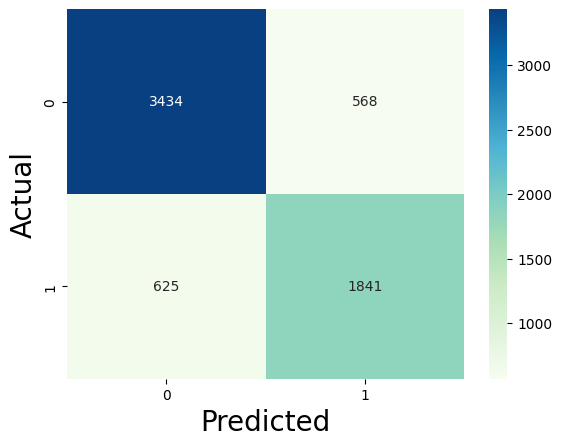

In [159]:
# Plotting confusion matrix
sns.heatmap(confusion_2, annot=True,fmt='g',cmap='GnBu')
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.show()

In [160]:
# Checking the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted_2)

0.8155534941249227

In [161]:
TP = confusion_2[1,1] # true positive
TN = confusion_2[0,0] # true negatives
FP = confusion_2[0,1] # false positives
FN = confusion_2[1,0] # false negatives

In [162]:
# Checking the sensitivity of the logistic regression model
TP / float(TP+FN)

0.7465531224655312

In [163]:
# Calculating specificity
TN / float(TN+FP)

0.8580709645177411

In [164]:
# Positive predictive value
print (TP / float(TP+FP))

0.7642175176421752


In [165]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8460211874846021


In [166]:
# Precision
confusion_2[1,1]/(confusion_2[0,1]+confusion_2[1,1])

0.7642175176421752

In [167]:
# Calculating 'Recall'
confusion_2[1,1]/(confusion_2[1,0]+confusion_2[1,1])

0.7465531224655312

In [168]:
# Observation:
#   By using the Precision - Recall trade off curve cut off point True Positive number has decreased and True Negative number has increased.
#   Hence, we cannot use Precision-Recall trade-off method as it reduced True Positive due to which 'Recall'/'sensitivity' decreased.
#   We have to increase Sensitivity Recall value to increase True Positives. Thus we will use 0.358 as optimal cutoff point.

In [169]:
# Adding Lead Score Feature to Training dataframe.
# A higher score would mean that the lead is hot, i.e. is most likely to convert.
# A lower score would mean that the lead is cold and will mostly not get converted.

In [170]:
# Adding Lead Score
y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  0.4  \
0        0.0        0.474082         1871          0    1    1    1    1    1   
1        0.0        0.073252         6795          0    1    0    0    0    0   
2        0.0        0.249087         3516          0    1    1    1    0    0   
3        0.0        0.768973         8105          1    1    1    1    1    1   
4        0.0        0.212973         3934          0    1    1    1    0    0   

   0.5  0.6  0.7  0.8  0.9  final_predicted_2  Lead_Score  
0    0    0    0    0    0                  1          47  
1    0    0    0    0    0                  0           7  
2    0    0    0    0    0                  0          25  
3    1    1    1    0    0                  1          77  
4    0    0    0    0    0                  0          21

## **Step 10: Making Predictions on Test Set**

In [171]:
# Scaling test data
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2772 entries, 4269 to 2960
Data columns (total 46 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              2772 non-null   int64  
 1   TotalVisits                               2772 non-null   float64
 2   Total Time Spent on Website               2772 non-null   int64  
 3   Page Views Per Visit                      2772 non-null   float64
 4   Free_copy                                 2772 non-null   int64  
 5   Lead Origin_Landing Page Submission       2772 non-null   bool   
 6   Lead Origin_Quick Add Form                2772 non-null   bool   
 7   Lead Source_Facebook                      2772 non-null   bool   
 8   Lead Source_Google                        2772 non-null   bool   
 9   Lead Source_Olark Chat                    2772 non-null   bool   
 10  Lead Source_Organic Search            

In [173]:
# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_test.select_dtypes(include=['int64','float64']).columns

# scaling columns
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_test = X_test[rfe_col]
X_test.head()

Total Time Spent on Website  Lead Origin_Landing Page Submission  \
4269                     0.964504                                False   
2376                    -0.885371                                False   
7766                    -0.777416                                False   
9199                    -0.885371                                False   
4359                    -0.885371                                False   

      Lead Source_Olark Chat  Lead Source_Reference  \
4269                   False                  False   
2376                   False                   True   
7766                   False                  False   
9199                    True                  False   
4359                   False                   True   

      Lead Source_Welingak Website  Last Activity_Email Opened  \
4269                         False                       False   
2376                         False                       False   
7766                         False                       False   
9199                         False                       False   
4359                         False                        True   

      Last Activity_Olark Chat Conversation  Last Activity_Others  \
4269                                  False                 False   
2376                                  False                 False   
7766                                  False                  True   
9199                                   True                 False   
4359                                  False                 False   

      Last Activity_SMS Sent  Specialization_Hospitality Management  \
4269                    True                                  False   
2376                    True                                  False   
7766                   False                                  False   
9199                   False                                  False   
4359                   False                                  False   

      Specialization_Others  Current_occupation_Working Professional  
4269                   True                                    False  
2376                   True                                    False  
7766                  False                                     True  
9199                   True                                    False  
4359                  False                                    False

In [174]:
# Adding contant value
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(2772, 13)

In [186]:
# Convert y_train and X_train_sm to float
y_test = y_test.astype(float)
X_test_sm = X_test_sm.astype(float)

# Make predictions using the new model
y_test_pred = logm4.predict(X_test_sm)

In [187]:
# Top 10 columns
y_test_pred[:10]

4269    0.697934
2376    0.860665
7766    0.889241
9199    0.057065
4359    0.871510
9186    0.503859
1631    0.419681
8963    0.154531
8007    0.072344
5324    0.298849
dtype: float64

In [188]:
# Changing to dataframe of predicted probability
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

0
4269  0.697934
2376  0.860665
7766  0.889241
9199  0.057065
4359  0.871510

In [189]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

Converted
4269        1.0
2376        1.0
7766        1.0
9199        0.0
4359        1.0

In [190]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_test_pred
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

Converted  Prospect ID         0
0        1.0         4269  0.697934
1        1.0         2376  0.860665
2        1.0         7766  0.889241
3        0.0         9199  0.057065
4        1.0         4359  0.871510

In [191]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

y_pred_final.head()

Prospect ID  Converted  Converted_Prob
0         4269        1.0        0.697934
1         2376        1.0        0.860665
2         7766        1.0        0.889241
3         9199        0.0        0.057065
4         4359        1.0        0.871510

In [192]:
# Taking sensitivity-specificity method at 0.345 probability cutoff during training
y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.345 else 0)
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  final_predicted
0         4269        1.0        0.697934                1
1         2376        1.0        0.860665                1
2         7766        1.0        0.889241                1
3         9199        0.0        0.057065                0
4         4359        1.0        0.871510                1

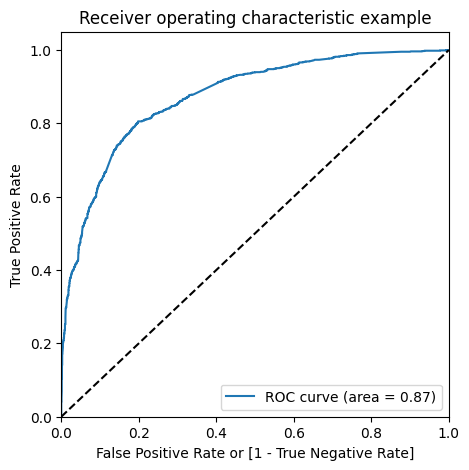

In [193]:
# Drawing ROC curve for Test Set
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Prob"], drop_intermediate = False )

draw_roc(y_pred_final["Converted"], y_pred_final["Converted_Prob"])

In [194]:
# Observation:
#   Area under ROC curve is 0.87 out of 1 which indicates a good predictive model.
#   Since final predictions are completed, we will evaluate the performance of the predictive model on the test dataset.

#### 10.1 Test Set Model Evaluation

In [197]:
# Finding Confusion matrix for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'])
print("*"*50,"\n")

print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[1353  324]
 [ 221  874]] 

************************************************** 



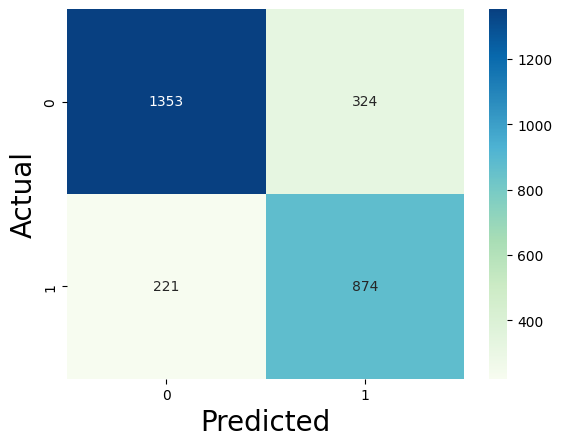

In [201]:
# Plotting confusion matrix:-
sns.heatmap(confusion_matrix, annot=True,fmt='g',cmap='GnBu')
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.show()

In [204]:
TP = confusion_matrix[1,1] # true positive
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [205]:
# Calculating Sensitivity of the logistic regression model
TP / float(TP+FN)

0.7981735159817351

In [206]:
# Calculating Specificity
TN / float(TN+FP)

0.8067978533094812

In [207]:
# Calculating False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.19320214669051877


In [208]:
# Positive predictive value
print (TP / float(TP+FP))

0.7295492487479132


In [209]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8595933926302414


In [214]:
# Precision
TP / float(TP + FP)

0.7295492487479132

In [215]:
# Recall
TP / float(TP + FN)

0.7981735159817351

In [217]:
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  final_predicted
0         4269        1.0        0.697934                1
1         2376        1.0        0.860665                1
2         7766        1.0        0.889241                1
3         9199        0.0        0.057065                0
4         4359        1.0        0.871510                1

In [219]:
# Calculating "precision_score"
precision_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7295492487479132

In [221]:
# Calculating "recall_score"
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7981735159817351

In [223]:
# Checking the overall accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8033910533910534

In [224]:
# Observation:
#   The evaluation metrics are close to each other which indicates that the model is performing consistently in both test and train dataset.
#   For Test Set below are the evaluation metrics:
#   Accuracy : 0.8033 which is 80.33%
#   Sensitivity : 0.7981 which is 79.81% ≈ 80%
#   Specificity : 0.8067 which is 80.67%

In [225]:
# Features and their coefficicent from final model
parameters=logm4.params.sort_values(ascending=False)
parameters

Lead Source_Welingak Website               5.388662
Lead Source_Reference                      2.925326
Current_occupation_Working Professional    2.669665
Last Activity_SMS Sent                     2.051879
Last Activity_Others                       1.253061
Total Time Spent on Website                1.049789
Last Activity_Email Opened                 0.942099
Lead Source_Olark Chat                     0.907184
Last Activity_Olark Chat Conversation     -0.555605
const                                     -1.023594
Specialization_Hospitality Management     -1.094445
Specialization_Others                     -1.203333
Lead Origin_Landing Page Submission       -1.258954
dtype: float64

In [226]:
# Observation:
#   A high positive coefficient indicates that a variable has a stronger influence on predicting the probability of leads
#   converting to take up X-Education's course.

In [227]:
# Adding Lead Score Feature to Test dataframe

#   A higher score means that the lead is hot which implies it is most likely to convert
#   A lower score means that the lead is cold and might not get converted.

In [228]:
y_pred_final['Lead_Score'] = y_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  final_predicted  Lead_Score
0         4269        1.0        0.697934                1          70
1         2376        1.0        0.860665                1          86
2         7766        1.0        0.889241                1          89
3         9199        0.0        0.057065                0           6
4         4359        1.0        0.871510                1          87

In [229]:
# Lead Score: Lead Score is assigned to the customers

# Customers with a higher lead score have a chance of high conversion.
# Customers with a lower lead score have a chance of lower conversion.

## **Conclusion**

**Train Data Set:**

Accuracy: 81.55%

Sensitivity: 80%

Specificity: 85.80%

**Test Data Set:**

Accuracy: 80.33%

Sensitivity: 79.81% ≈ 80%

Specificity: 80.67%

In [230]:
# Sensitivity indicates how many leads the model was able to identify correctly out of all potential conversion leads.
# The CEO of X Education had set a target sensitivity of around 80%.
# The model achieved an accuracy of 81.55%, which is in line with the study's objectives.

In [231]:
# Top 3 features which contributes positively to predicting hot leads in the model are:
#   Lead Source_Welingak Website
#   Lead Source_Reference
#   Current_occupation_Working Professional

In [232]:
# RECOMMENDATIONS:
# To improve the potential lead conversion rate X-Education will have to mainly focus on below:

#   1. Prioritize features with positive coefficients to refine targeted marketing tactics effectively.
#   2. Formulate strategies to attract top-quality leads from high-performing lead sources.
#   3. Tailor messaging to engage working professionals more effectively.
#   4. Optimize communication channels based on their impact on lead engagement.
#   5. Allocate more budget to advertising on the Welingak Website to maximize visibility and impact.
#   6. Implement incentives or discounts for successful lead referrals to encourage further referrals.
#   7. Focus marketing efforts on working professionals, leveraging their high conversion rates and potentially higher financial capacity for
#      increased fee structures.

In [233]:
# Areas for enhancement:
#   1. Examine specialization offerings with negative coefficients to identify potential improvements.
#   2. Evaluate the landing page submission process to identify opportunities for enhancement.